#### Importing Libraries

In [1]:
!pip install nltk
!pip install -U spacy
!pip install wordcloud


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.1 which is incompatible.


In [2]:
import spacy
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
!python -m spacy download en_core_web_md
nlp = spacy.load('en_core_web_md')

2023-10-10 02:50:46.084134: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 21.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from matplotlib.pyplot import imread

#### Elon Musk tweet - Text Extraction and Sentiment Analysis

In [167]:
# Importing Elon musk dataset

elon = pd.read_csv('/content/Elon_musk.csv',encoding='ISO-8859-1')
elon

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [168]:
# Dropping Unnamed column
elon.drop('Unnamed: 0',axis=1,inplace=True)
elon

Text
0                                @kunalb11 Im an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

In [7]:
len(elon)

1999

In [8]:
elon = [x.strip() for x in elon['Text']]   #Removing both leading and trailing spaces
elon = [x for x in elon if x]  # removing empty strigs, because in ppython they considered as False
elon[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [9]:
# Joining the list into one string/text
text = ' '.join(elon)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [10]:
# Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [11]:
# Tokenization

from nltk.tokenize import word_tokenize
text_token = word_tokenize(no_punc_text)
print(text_token[0:50])

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo']


In [12]:
len(text_token)

21078

In [13]:
# Normalization of the data
lower_words = [x.lower() for x in text_token]
print(lower_words[0:25])

['kunalb11', 'i\x92m', 'an', 'alien', 'idaacarmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'is', 'underestimated']


In [14]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords = stopwords.words('english')
stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
# Stopword Removal
with open('stop.txt','r') as file:
  stopwords = file.read()
print(stopwords)

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
against
ain't
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
apart
appear
appreciate
appropriate
are
aren't
around
as
aside
ask
asking
associated
at
available
away
awfully
b
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
believe
below
beside
besides
best
better
between
beyond
both
brief
but
by
c
c'mon
c's
came
can
can't
cannot
cant
cause
causes
certain
certainly
changes
clearly
co
com
come
comes
concerning
consequently
consider
considering
contain
containing
contains
corresponding
could
couldn't
course
currently
d
definitely
described
despite
did
didn't
different
do
does
doesn't
doing
don't
done
down
downwards
during
e
each
edu
eg
eight
either
else
elsewhere
enough
entirely
especially
et
etc
even
ever
every
everybody
everyone
everything
everywhere
ex
exactly
example

In [17]:
no_stop_tkns = [word for word in lower_words if  word not in stopwords]     #token = tkns,    variable name
no_stop_tkns[0:50]

['kunalb11',
 'i\x92m',
 'alien',
 'idaacarmack',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'joerogan',
 'spotify',
 'great',
 'interview',
 'gtera27',
 'doge',
 'underestimated',
 'teslacn',
 'congratulations',
 'tesla',
 'china',
 'amazing',
 'execution',
 'year',
 'happy',
 'year',
 'ox',
 'httpstco9wfkmyu2oj',
 'frodo',
 'underdoge',
 'thought',
 'fail',
 'httpstcozgxjfdzzrm',
 'owensparks',
 'flcnhvy',
 'anonyx10',
 'haha',
 'flcnhvy',
 'anonyx10',
 'tweets',
 'represent',
 'realworld',
 'allocation',
 'entertaining',
 'outcome',
 'givedirectly',
 'agree',
 'clubhouse',
 'kanyewest',
 'httpstco3rwe9uhsts',
 'geoffkeighley']

In [18]:
len(no_stop_tkns)

12216

In [19]:
#Stemming

from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [20]:
stemmed_tkns = [ps.stem(word) for word in no_stop_tkns]
print(stemmed_tkns[0:50])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'year', 'happi', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'thought', 'fail', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi', 'anonyx10', 'haha', 'flcnhvi', 'anonyx10', 'tweet', 'repres', 'realworld', 'alloc', 'entertain', 'outcom', 'givedirectli', 'agre', 'clubhous', 'kanyewest', 'httpstco3rwe9uhst', 'geoffkeighley']


In [21]:
#Checking stemmed word with respect to original words

for w in no_stop_tkns:
  print(w, ":", ps.stem(w))

Streaming output truncated to the last 5000 lines.
broke : broke
301 : 301
304 : 304
interface : interfac
sn9 : sn9
httpstcowpeprv5s4r : httpstcowpeprv5s4r
nasaspaceflight : nasaspaceflight
austinbarnard45 : austinbarnard45
ppathole : ppathol
8 : 8
bar : bar
differential : differenti
ullage : ullag
9 : 9
bar : bar
base : base
due : due
propellant : propel
head : head
it : it
httpstcoqvgkyw2qd0 : httpstcoqvgkyw2qd0
ppathole : ppathol
height : height
test : test
flaps : flap
drawing : draw
propellant : propel
headers : header
tanks : tank
httpstcopgzafesc7x : httpstcopgzafesc7x
flight : flight
15km : 15km
50000 : 50000
nosecone : nosecon
front : front
flaps : flap
week : week
sn9 : sn9
month : month
starship : starship
sn8 : sn8
rear : rear
flaps : flap
httpstcogdxmbzx0ct : httpstcogdxmbzx0ct
waitbutwhy : waitbutwhi
httpstcov6us36yho6 : httpstcov6us36yho6
muratpak : muratpak
evafoxu : evafoxu
true : true
spacex : spacex
falcon : falcon
9 : 9
launch : launch
nasas : nasa
super : super

In [22]:
# Creating/ Converting into string
doc = nlp(' '.join(stemmed_tkns))
print(doc[0:50])

kunalb11 im alien idaacarmack ray trace cyberpunk hdr nextlevel joerogan spotifi great interview gtera27 doge underestim teslacn congratul tesla china amaz execut year happi year ox httpstco9wfkmyu2oj frodo underdog thought fail httpstcozgxjfdzzrm owenspark flcnhvi anonyx10 haha flcnhvi anonyx10 tweet repres realworld alloc entertain outcom givedirectli agre clubhous kanyewest httpstco3rwe9uhst geoffkeighley


In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [24]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

In [25]:
# Lemmatizing(Advanced version of Stemming) the words
for w in lower_words:
  print(w, ':', lemma.lemmatize(w))

Streaming output truncated to the last 5000 lines.
error : error
in : in
canada : canada
the : the
lease : lease
payment : payment
is : is
specifically : specifically
lower : lower
than : than
loan : loan
financing : financing
as : a
tesla : tesla
expec : expec
httpstcovae3ppljox : httpstcovae3ppljox
tobyliiiiiiiiii : tobyliiiiiiiiii
erdayastronaut : erdayastronaut
nextspaceflight : nextspaceflight
we : we
will : will
push : push
for : for
ten : ten
flights : flight
with : with
starlink : starlink
flcnhvy : flcnhvy
erdayastronaut : erdayastronaut
nextspaceflight : nextspaceflight
almost : almost
never : never
need : need
to : to
replace : replace
whole : whole
engine : engine
but : but
some : some
individual : individual
parts : part
like : like
httpstcofdnxdwh4et : httpstcofdnxdwh4et
erdayastronaut : erdayastronaut
cnunezimages : cnunezimages
spaceintellige3 : spaceintellige3
mostly : mostly
for : for
employees : employee
but : but
well : well
support : support
public : public
acces

In [81]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)

In [82]:
lower_words

['kunalb11',
 'i\x92m',
 'an',
 'alien',
 'idaacarmack',
 'ray',
 'tracing',
 'on',
 'cyberpunk',
 'with',
 'hdr',
 'is',
 'nextlevel',
 'have',
 'you',
 'tried',
 'it',
 'joerogan',
 'spotify',
 'great',
 'interview',
 'gtera27',
 'doge',
 'is',
 'underestimated',
 'teslacn',
 'congratulations',
 'tesla',
 'china',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'happy',
 'new',
 'year',
 'of',
 'the',
 'ox',
 'httpstco9wfkmyu2oj',
 'frodo',
 'was',
 'the',
 'underdoge',
 'all',
 'thought',
 'he',
 'would',
 'fail',
 'himself',
 'most',
 'of',
 'all',
 'httpstcozgxjfdzzrm',
 'owensparks',
 'flcnhvy',
 'anonyx10',
 'haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'indeed',
 'tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'the',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'givedirectly',
 'just',
 'sent',
 'some',
 'just',
 'agree',
 'to',
 'do',
 

In [83]:
 nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [84]:
lemmatizer = WordNetLemmatizer()

In [85]:
for token, tag in pos_tag(lower_words):
  lemma = lemmatizer.lemmatize(token, tag_map[tag[0]])

##### Feature Extraction

In [86]:
# Creating Vector space

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X = vect.fit_transform(stemmed_tkns)

In [87]:
print(vect.vocabulary_)

{'kunalb11': 2455, 'alien': 222, 'idaacarmack': 2236, 'ray': 3224, 'trace': 3989, 'cyberpunk': 864, 'hdr': 1488, 'nextlevel': 2842, 'joerogan': 2383, 'spotifi': 3658, 'great': 1424, 'interview': 2314, 'gtera27': 1443, 'doge': 1000, 'underestim': 4141, 'teslacn': 3861, 'congratul': 771, 'tesla': 3855, 'china': 663, 'amaz': 238, 'execut': 1165, 'year': 4364, 'happi': 1471, 'ox': 2959, 'httpstco9wfkmyu2oj': 1664, 'frodo': 1322, 'underdog': 4140, 'thought': 3924, 'fail': 1200, 'httpstcozgxjfdzzrm': 2197, 'owenspark': 2956, 'flcnhvi': 1265, 'anonyx10': 265, 'haha': 1457, 'tweet': 4038, 'repres': 3291, 'realworld': 3244, 'alloc': 225, 'entertain': 1119, 'outcom': 2939, 'givedirectli': 1398, 'agre': 195, 'clubhous': 703, 'kanyewest': 2417, 'httpstco3rwe9uhst': 1602, 'geoffkeighley': 1379, 'unrealengin': 4165, 'it': 2335, 'bought': 514, 'dogecoin': 1002, 'lil': 2519, 'toddler': 3958, 'hodler': 1535, 'joshmanmod': 2395, 'issu': 2333, 'sentenc': 3461, 'bit': 464, 'high': 1518, 'freewalletorg': 1

In [88]:
print(vect.get_feature_names_out()[1:20])
print(X.toarray()[0:50])

['10' '100' '1000' '10000' '100kg' '100m' '107' '10pm' '10x' '11' '112'
 '11thhour' '12' '122m' '13' '130pm' '13arm13arm' '13ericralph31' '14']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


##### Let's see how can bigrams and trigrams can be included here

In [89]:
# Creating vectors for Unigram , Bi-gram, Trigram, and Four-gram
vect_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,4),max_features=100)
bow_matrix_ngram = vect_ngram_range.fit_transform(elon)

In [90]:
print(vect_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['0001f923' '0001f923 0001f923' 'about' 'all' 'also' 'amp' 'an' 'and'
 'are' 'as' 'at' 'be' 'but' 'by' 'can' 'cleantechnica' 'co' 'do' 'dragon'
 'erdayastronaut' 'first' 'flcnhvy' 'for' 'from' 'good' 'great' 'haha'
 'has' 'have' 'he' 'high' 'https' 'https co' 'id_aa_carmack' 'if' 'in'
 'in the' 'is' 'it' 'just' 'kristennetten' 'launch' 'like' 'make'
 'marcushousegame' 'more' 'most' 'much' 'my' 'nasa' 'nasaspaceflight'
 'need' 'new' 'no' 'not' 'of' 'of the' 'on' 'one' 'or' 'our' 'out'
 'people' 'ppathole' 'probably' 'rationaletienne' 're' 'rt' 'rt spacex'
 'should' 'so' 'some' 'spacex' 'starship' 'sure' 'tesla' 'teslaownerssv'
 'teslarati' 'than' 'that' 'the' 'there' 'they' 'this' 'this is' 'to'
 'too' 'true' 'was' 'we' 'what' 'wholemarsblog' 'will' 'will be' 'with'
 'would' 'yeah' 'year' 'yes' 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


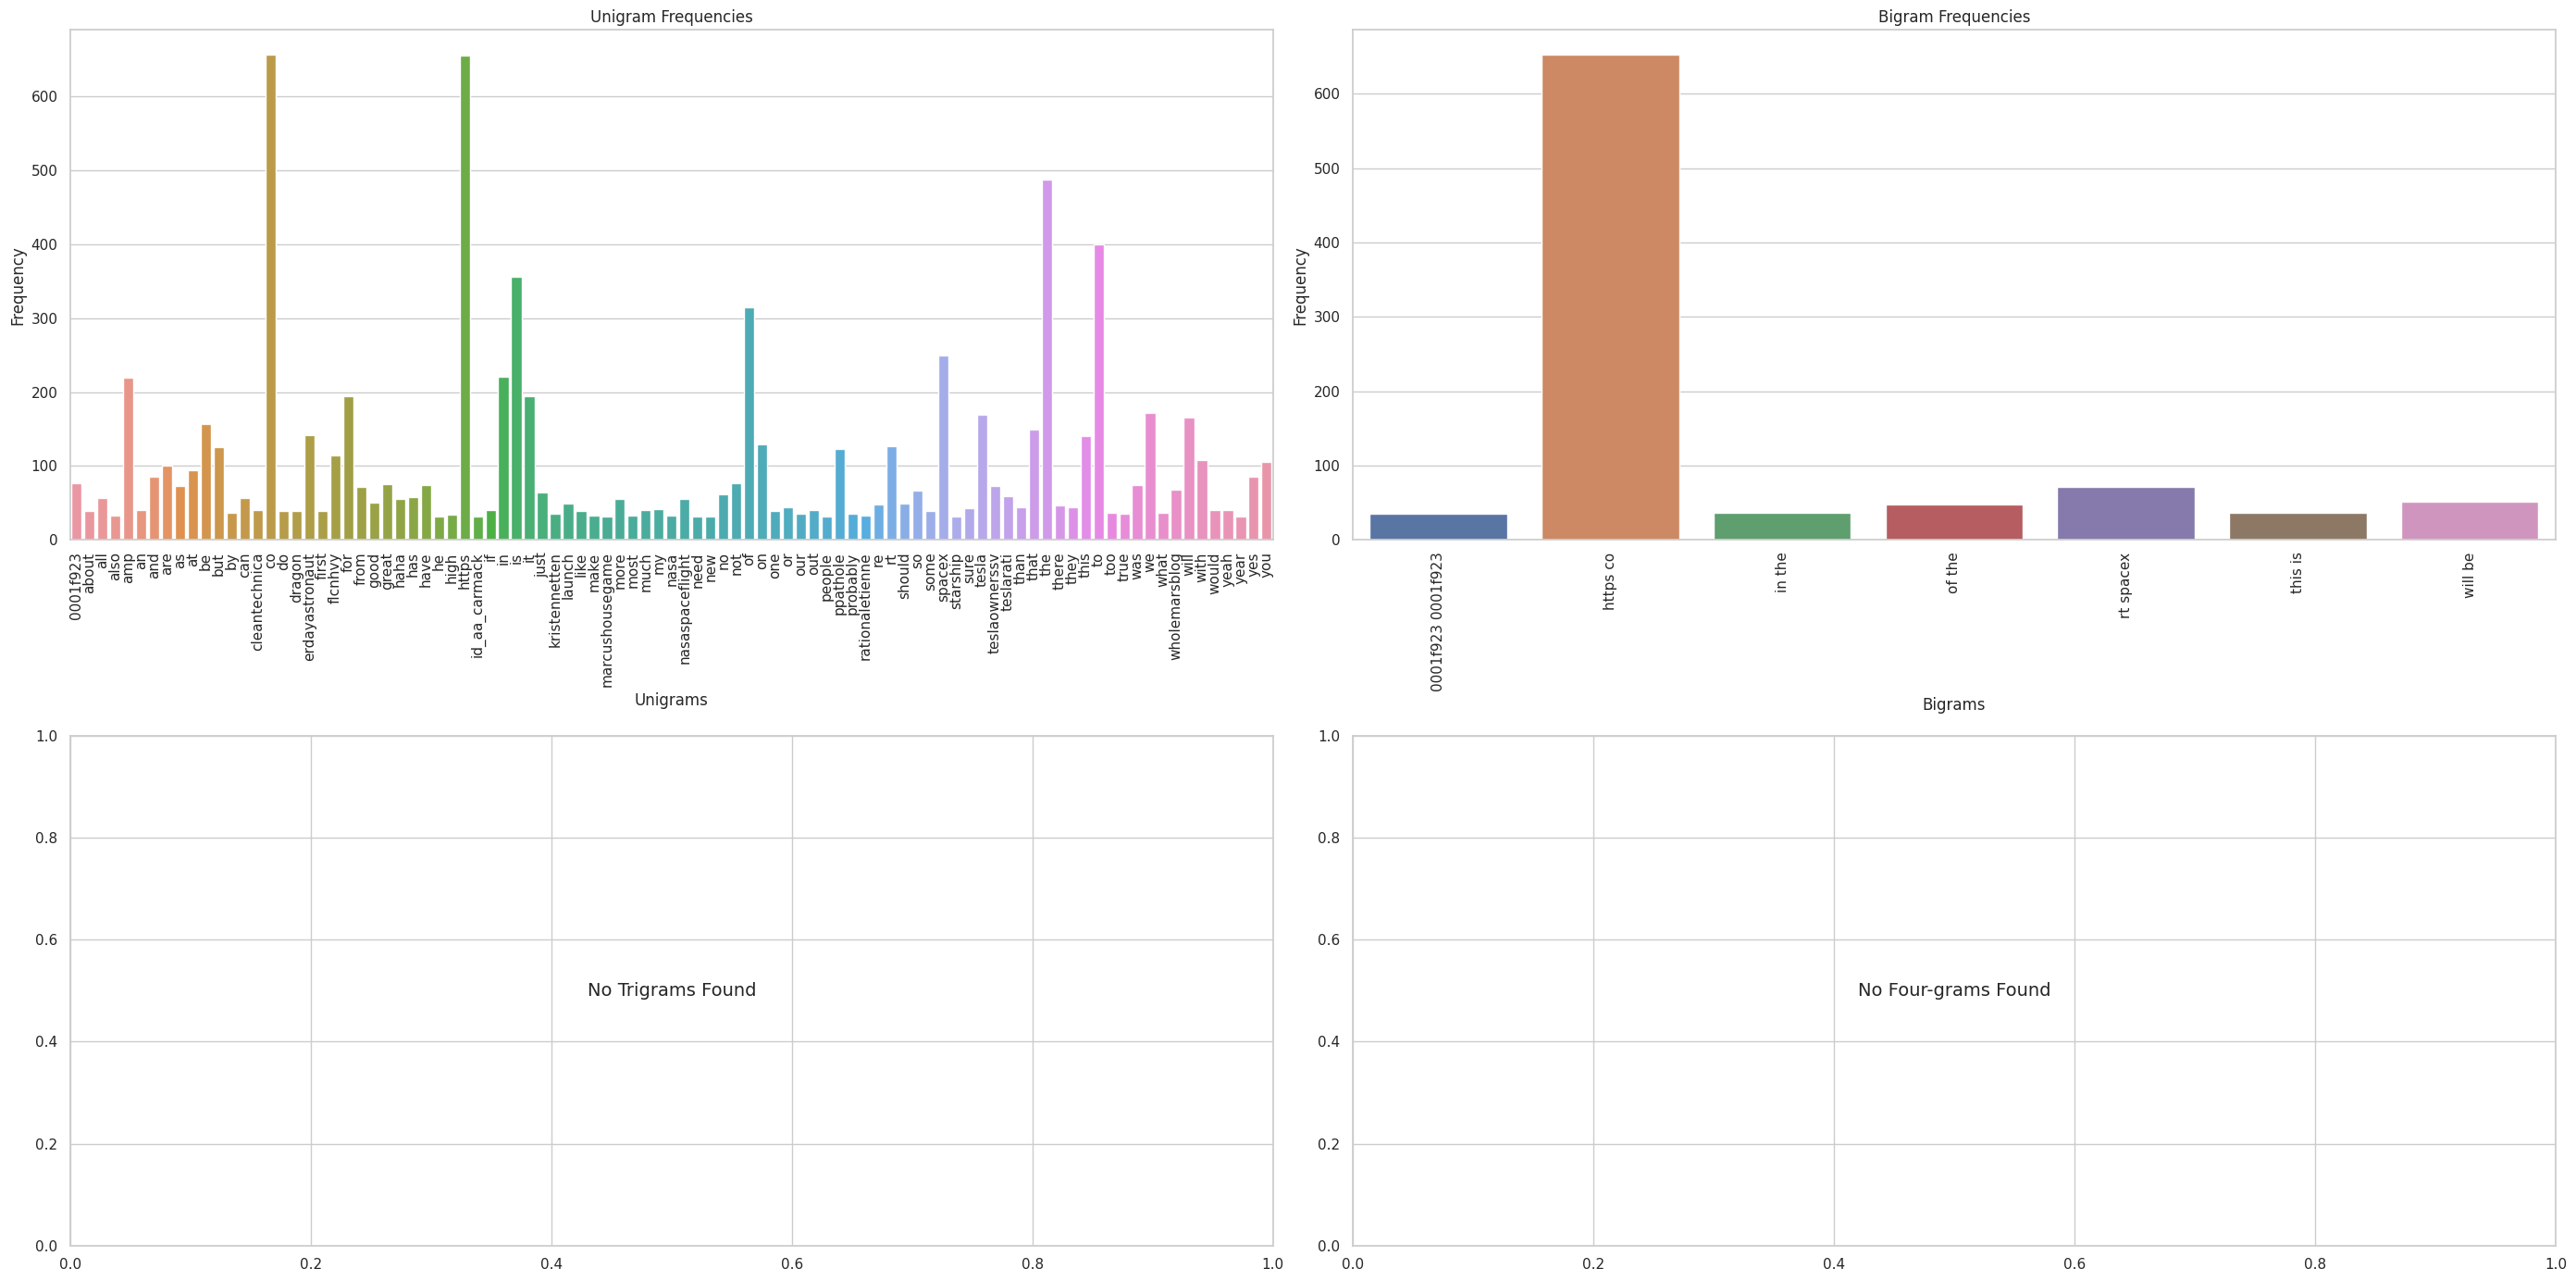

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Getting feature names from CountVectorizer
feature_names = vect_ngram_range.get_feature_names_out()

# Converting bag-of-words matrix to a DataFrame for easy manipulation
bow_df = pd.DataFrame(bow_matrix_ngram.toarray(), columns=feature_names)

# Creating a function to filter n-grams based on length
def filter_ngrams(bow_df, n):
    return bow_df.loc[:, bow_df.columns.str.split().str.len() == n]

# Filtering unigrams, bigrams, trigrams, and four-grams
unigram_df = filter_ngrams(bow_df, 1)
unigram_freq = unigram_df.sum(axis=0)

bigram_df = filter_ngrams(bow_df, 2)
bigram_freq = bigram_df.sum(axis=0)

trigram_df = filter_ngrams(bow_df, 3)
trigram_freq = trigram_df.sum(axis=0)

fourgram_df = filter_ngrams(bow_df, 4)
fourgram_freq = fourgram_df.sum(axis=0)

# Setting the style for Seaborn plots (optional)
sns.set(style="whitegrid")

# Creating a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(28, 14))

# Plotting unigram frequencies using Seaborn
sns.barplot(x=unigram_freq.index, y=unigram_freq.values, ax=axes[0, 0])
axes[0, 0].set_title("Unigram Frequencies")
axes[0, 0].set_xlabel("Unigrams")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].tick_params(axis='x', rotation=90)

# Plotting bigram frequencies using Seaborn
sns.barplot(x=bigram_freq.index, y=bigram_freq.values, ax=axes[0, 1])
axes[0, 1].set_title("Bigram Frequencies")
axes[0, 1].set_xlabel("Bigrams")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].tick_params(axis='x', rotation=90)

# Checking if there are any trigrams present before plotting
if not trigram_freq.empty:
    # Plotting trigram frequencies using Seaborn
    sns.barplot(x=trigram_freq.index, y=trigram_freq.values, ax=axes[1, 0])
    axes[1, 0].set_title("Trigram Frequencies")
    axes[1, 0].set_xlabel("Trigrams")
    axes[1, 0].set_ylabel("Frequency")
    axes[1, 0].tick_params(axis='x', rotation=90)
else:
    # If no trigrams are present, adding a message to the plot
    axes[1, 0].text(0.5, 0.5, "No Trigrams Found", ha='center', va='center', fontsize=14)

# Checking if there are any four-grams present before plotting
if not fourgram_freq.empty:
    # Plotting four-gram frequencies using Seaborn
    sns.barplot(x=fourgram_freq.index, y=fourgram_freq.values, ax=axes[1, 1])
    axes[1, 1].set_title("Four-gram Frequencies")
    axes[1, 1].set_xlabel("Four-grams")
    axes[1, 1].set_ylabel("Frequency")
    axes[1, 1].tick_params(axis='x', rotation=90)
else:
    # If no four-grams are present, adding a message to the plot
    axes[1, 1].text(0.5, 0.5, "No Four-grams Found", ha='center', va='center', fontsize=14)

# Adjusting subplot spacing
plt.tight_layout()

# Show the subplots
plt.show()


In [92]:
# Checking for trigrams, wheather it is empty or not
trigrams_present = trigram_df.columns[trigram_df.sum() > 0]

# Checking for four-grams
fourgrams_present = fourgram_df.columns[fourgram_df.sum() > 0]

print("Trigrams Present:")
print(trigrams_present)

print("\nFour-grams Present:")
print(fourgrams_present)


Trigrams Present:
Index([], dtype='object')

Four-grams Present:
Index([], dtype='object')


    Since, there is no words in trigram and four grams so the plot is blank

##### TF-IDF Vecctorizer

In [ ]:
# Creating Vector Space using TF-IDF Vectorizer

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [94]:
tfidf_vect = TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)

In [95]:
tfidf_matrix = tfidf_vect.fit_transform(elon)

In [96]:
print(tfidf_vect.get_feature_names_out())
print(tfidf_matrix.toarray())

['0001f525' '0001f5a4' '0001f923' '0001f923 0001f923' '20' '28delayslater'
 '60' 'about' 'absolutely' 'accurate' 'actually' 'after' 'ai'
 'ajtourville' 'all' 'almost' 'also' 'although' 'am' 'amazing' 'amp' 'an'
 'and' 'any' 'appreciated' 'archillect' 'are' 'as' 'astro_doug'
 'astrobehnken' 'astrojordy' 'astronauts' 'at' 'at tesla'
 'austinbarnard45' 'autopilot' 'back' 'bad' 'bar' 'be' 'be great' 'been'
 'being' 'berlin' 'berniesanders' 'best' 'beta' 'better' 'between' 'big'
 'bit' 'boca' 'bocachicagal' 'body' 'booster' 'boringcompany' 'both'
 'build' 'but' 'but it' 'but we' 'by' 'c_bass3d' 'can' 'car' 'cargo'
 'cars' 'caspar_stanley' 'cleantechnica' 'close' 'co' 'come' 'coming'
 'coming soon' 'companies' 'confirmed' 'congratulations' 'cool' 'cost'
 'could' 'crew' 'crew dragon' 'data' 'day' 'days' 'definitely' 'design'
 'did' 'different' 'djsnm' 'do' 'doesn' 'doge' 'doing' 'dojo' 'don' 'done'
 'down' 'dragon' 'driving' 'droneship' 'early' 'earth' 'easy' 'electric'
 'energy' 'engine' 'en

##### Generating WordCloud

In [97]:
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [98]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(50,40))   #Defining image size
  plt.imshow(wordcloud)    # Display image
  plt.axis('off')       #No axis details

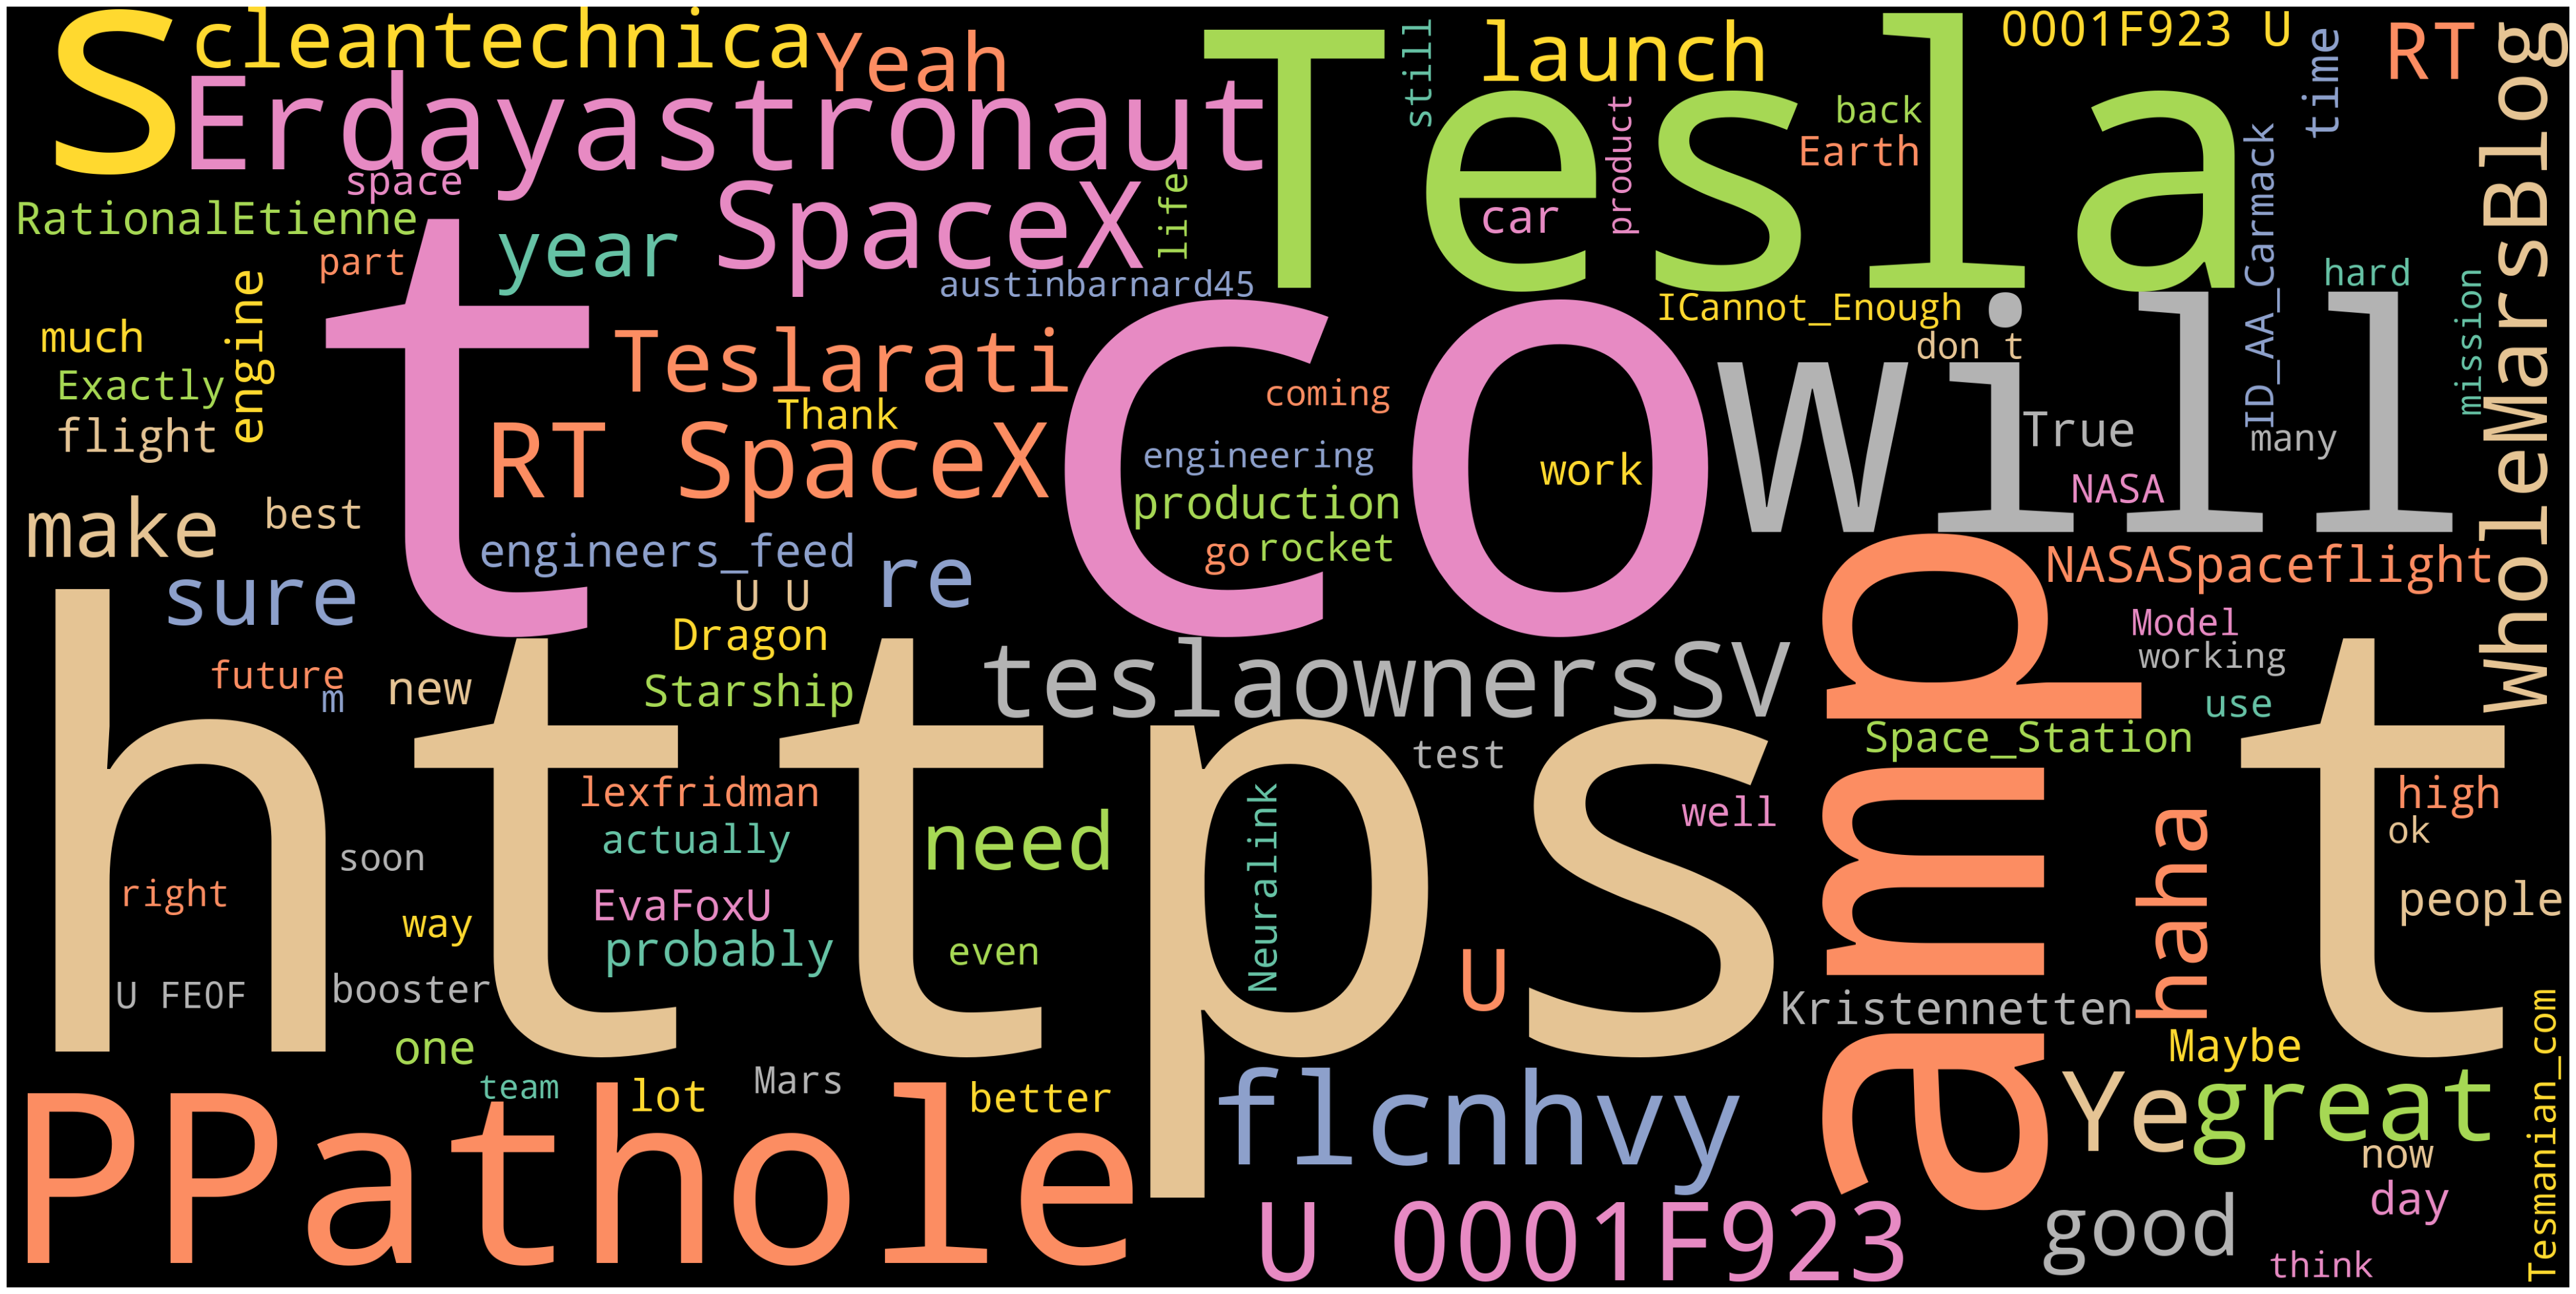

In [99]:
wordcloud = WordCloud(width=4000,height=2000,background_color='black',max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
plot_cloud(wordcloud)

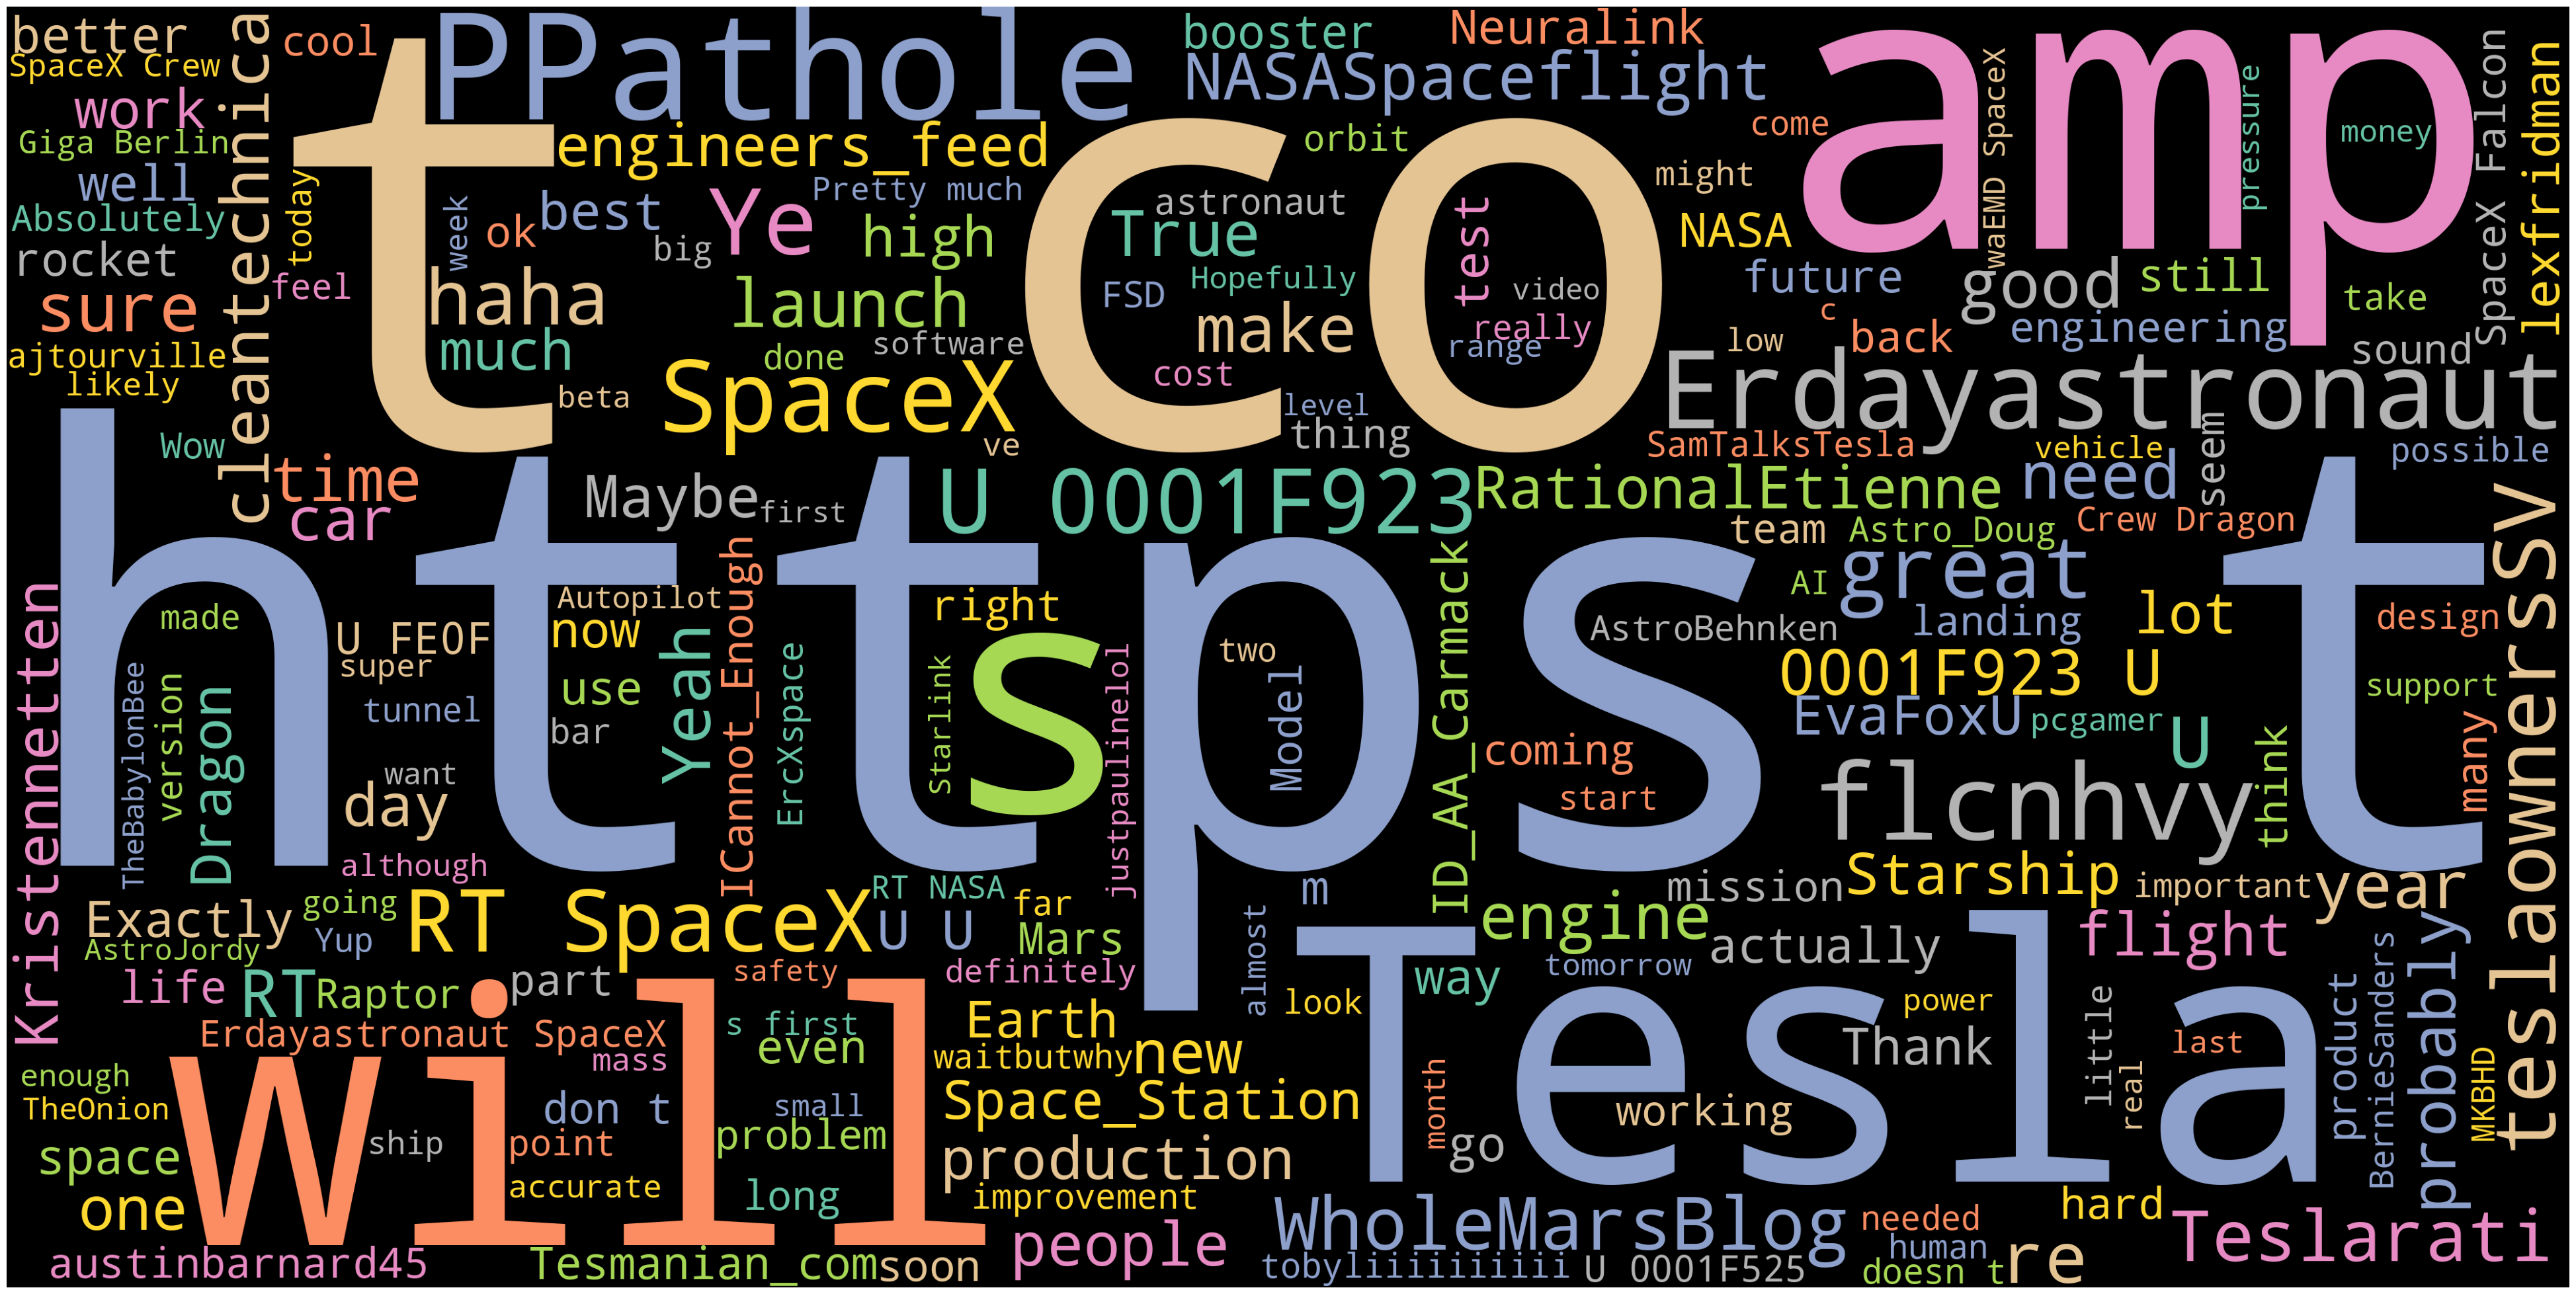

In [100]:
#Generating WorlCloud

stopwords = STOPWORDS
# stopwords.add('will')
# stopwords.add('elon)

wordcloud = WordCloud(width=4000,height=2000,background_color='black',max_words=200,colormap='Set2',stopwords=stopwords).generate(text)
plot_cloud(wordcloud)

In [101]:
# Saving image
wordcloud.to_file('wordcloud.png')

In [102]:
!pip install textblob

In [103]:
# Checking sentiment of each tweet using TextBlob
from textblob import TextBlob

# Load the dataset
df = pd.read_csv('/content/Elon_musk.csv',encoding='ISO-8859-1')

# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis to the 'Text' column
df['Sentiment'] = df['Text'].apply(get_sentiment)

# Display the results
print(df[['Text', 'Sentiment']].head(50))


                                                 Text Sentiment
0                              @kunalb11 Im an alien  Negative
1   @ID_AA_Carmack Ray tracing on Cyberpunk with H...   Neutral
2                 @joerogan @Spotify Great interview!  Positive
3                     @gtera27 Doge is underestimated   Neutral
4   @teslacn Congratulations Tesla China for amazi...  Positive
5   Happy New Year of the Ox! https://t.co/9WFKMYu2oj  Positive
6   Frodo was the underdoge,\nAll thought he would...   Neutral
7      @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)  Positive
8   @flcnhvy @anonyx10 Indeed! Tweets definitely d...   Neutral
9    The most entertaining outcome is the most likely  Positive
10                       @GiveDirectly Just sent some   Neutral
11         Just agree to do Clubhouse with @kanyewest   Neutral
12                            https://t.co/3rWE9uHSTS   Neutral
13     @geoffkeighley @UnrealEngine Its getting real  Positive
14  Bought some Dogecoin for lil X, so h

#### iPhone Reviews - Emotion Minig

In [104]:
# Importing data
iphone = pd.read_csv('/content/iphone_reviews.csv')

In [105]:
iphone.head()

category  rating                              product  \
0  Mobiles & Accessories       1  New Apple iPhone 11 (64GB) - Purple   
1  Mobiles & Accessories       1  New Apple iPhone 11 (64GB) - Purple   
2  Mobiles & Accessories       1  New Apple iPhone 11 (64GB) - Purple   
3  Mobiles & Accessories       1  New Apple iPhone 11 (64GB) - Purple   
4  Mobiles & Accessories       1  New Apple iPhone 11 (64GB) - Purple   

  helpful_count           crawled_at                 sub_category        asin  \
0           356  2021-01-26 13:54:03  Smartphones & Basic Mobiles  B08L8CHS2X   
1           363  2021-01-26 13:54:03  Smartphones & Basic Mobiles  B08L8CHS2X   
2           239  2021-01-26 13:54:03  Smartphones & Basic Mobiles  B08L8CHS2X   
3           277  2021-01-26 13:54:03  Smartphones & Basic Mobiles  B08L8CHS2X   
4           191  2021-01-26 13:54:03  Smartphones & Basic Mobiles  B08L8CHS2X   

  review_country                                    raw_description  \
0          India  <span class="a-size-base review-text review-te...   
1          India  <span class="a-size-base review-text review-te...   
2          India  <span class="a-size-base review-text review-te...   
3          India  <span class="a-size-base review-text review-te...   
4          India  <span class="a-size-base review-text review-te...   

                                         description     profile_name  \
0  \n\n  The phone seems to be owned by some shiv...  Amazon Customer   
1  \n\n  Its my first iphone and now I’m feeling ...     Bhawna juyal   
2  \n\n  I found this black spot while doing set ...          Vinayak   
3  \n\n  Samsung s10 is much better than iphone 1...     Shipra Goyal   
4  \n\n  hiI had purchased this phone in first we...      gaurav garg   

           reviewed_at                                   _id  average_rating  \
0  2020-06-10 00:00:00  f7030d10-c987-536b-a356-f642cb1ec5e3             4.5   
1  2019-10-10 00:00:00  775c9997-8c2c-5dda-9faf-0f0e29ac9cb0             4.5   
2  2020-06-06 00:00:00  089a10aa-ef92-577c-93f7-fd85e26f6bf0             4.5   
3  2019-10-23 00:00:00  217a69c8-f3d6-58b0-9ec0-8a1e3514e24e             4.5   
4  2020-06-24 00:00:00  5e2e9ea9-a32d-51fe-bd7b-f0ebe5749ebd             4.5   

  product_company                        review_title  review_uniq_id  \
0           Apple                  Second hand device   RCNKLUGAMJBPH   
1           Apple                       Heating issue  R1HWMMIJ21WTZR   
2           Apple  Black spot found on the new phone.  R3FZWAU9I8B7Q5   
3           Apple   Samsung s10 is better than iphone  R386FDLMAZDUPG   
4           Apple                     Defective model   RXAOS1IG04N09   

                                              images  verified_purchase  \
0                                                 []               True   
1                                                 []               True   
2  ['https://images-na.ssl-images-amazon.com/imag...               True   
3                                                 []               True   
4                                                 []               True   

   total_comments  
0               0  
1               0  
2               0  
3               0  
4               0

In [106]:
# Picking the column which contains the reviews
iphone = iphone[['description']]
iphone.head()

description
0  \n\n  The phone seems to be owned by some shiv...
1  \n\n  Its my first iphone and now I’m feeling ...
2  \n\n  I found this black spot while doing set ...
3  \n\n  Samsung s10 is much better than iphone 1...
4  \n\n  hiI had purchased this phone in first we...

In [107]:
iphone['description'] = iphone['description'].astype('str')
iphone['description'].dtypes

dtype('O')

In [108]:
iphone = [i.strip() for i in iphone['description']] # Removing both the leading and the trailing characters
iphone = [i for i in iphone if i] # Removing empty strings, because they are considered in Python as False
iphone[0:10]

["The phone seems to be owned by some shivang gupta earlier...he has all his details filled in...it's dishearting to know that an esteemed company like apple and amazon woul provide it's users a second hand device. This needs serious and immediate attention.Regards,Deputy directorBureau of Indian standardsMinistry of consumer affairs and public distributionMinistry of consumer affairs",
 'Its my first iphone and now I’m feeling like I’ve wasted my money coz it has heating issues',
 "I found this black spot while doing set up. Given me defective piece & now not able to give for replacement also. It's a very next day of purchase.",
 'Samsung s10 is much better than iphone 11',
 'hiI had purchased this phone in first week of June 2020 trusting amazon.But this phone is defective, it failed to update, failed to connect to serversFinding no other solution, I used old version of iOS hoping it will work finebut it is not working fine, everytime it hangs and I am not able to worktoday while put

In [109]:
iphone

["The phone seems to be owned by some shivang gupta earlier...he has all his details filled in...it's dishearting to know that an esteemed company like apple and amazon woul provide it's users a second hand device. This needs serious and immediate attention.Regards,Deputy directorBureau of Indian standardsMinistry of consumer affairs and public distributionMinistry of consumer affairs",
 'Its my first iphone and now I’m feeling like I’ve wasted my money coz it has heating issues',
 "I found this black spot while doing set up. Given me defective piece & now not able to give for replacement also. It's a very next day of purchase.",
 'Samsung s10 is much better than iphone 11',
 'hiI had purchased this phone in first week of June 2020 trusting amazon.But this phone is defective, it failed to update, failed to connect to serversFinding no other solution, I used old version of iOS hoping it will work finebut it is not working fine, everytime it hangs and I am not able to worktoday while put

In [114]:
string_for_wordcloud = ' '.join(iphone)

In [115]:
# Parts of Speech Tagging (POS tag)
one_block = iphone[0]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [117]:
df = ' '.join(iphone[0:10])
df

"The phone seems to be owned by some shivang gupta earlier...he has all his details filled in...it's dishearting to know that an esteemed company like apple and amazon woul provide it's users a second hand device. This needs serious and immediate attention.Regards,Deputy directorBureau of Indian standardsMinistry of consumer affairs and public distributionMinistry of consumer affairs Its my first iphone and now I’m feeling like I’ve wasted my money coz it has heating issues I found this black spot while doing set up. Given me defective piece & now not able to give for replacement also. It's a very next day of purchase. Samsung s10 is much better than iphone 11 hiI had purchased this phone in first week of June 2020 trusting amazon.But this phone is defective, it failed to update, failed to connect to serversFinding no other solution, I used old version of iOS hoping it will work finebut it is not working fine, everytime it hangs and I am not able to worktoday while putting it for charg

In [118]:
block = df
doc_block = nlp(block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [119]:
doc_block

The phone seems to be owned by some shivang gupta earlier...he has all his details filled in...it's dishearting to know that an esteemed company like apple and amazon woul provide it's users a second hand device. This needs serious and immediate attention.Regards,Deputy directorBureau of Indian standardsMinistry of consumer affairs and public distributionMinistry of consumer affairs Its my first iphone and now I’m feeling like I’ve wasted my money coz it has heating issues I found this black spot while doing set up. Given me defective piece & now not able to give for replacement also. It's a very next day of purchase. Samsung s10 is much better than iphone 11 hiI had purchased this phone in first week of June 2020 trusting amazon.But this phone is defective, it failed to update, failed to connect to serversFinding no other solution, I used old version of iOS hoping it will work finebut it is not working fine, everytime it hangs and I am not able to worktoday while putting it for chargi

In [120]:
# POS tagging of each word

for token in doc_block:
  print(token, ':', token.pos_)

The : DET
phone : NOUN
seems : VERB
to : PART
be : AUX
owned : VERB
by : ADP
some : DET
shivang : NOUN
gupta : X
earlier : ADV
... : PUNCT
he : PRON
has : VERB
all : DET
his : PRON
details : NOUN
filled : VERB
in : ADP
... : PUNCT
it : PRON
's : AUX
dishearting : VERB
to : PART
know : VERB
that : SCONJ
an : DET
esteemed : ADJ
company : NOUN
like : ADP
apple : NOUN
and : CCONJ
amazon : NOUN
woul : AUX
provide : VERB
it : PRON
's : PART
users : NOUN
a : DET
second : ADJ
hand : NOUN
device : NOUN
. : PUNCT
This : PRON
needs : VERB
serious : ADJ
and : CCONJ
immediate : ADJ
attention : NOUN
. : PUNCT
Regards : PROPN
, : PUNCT
Deputy : PROPN
directorBureau : NOUN
of : ADP
Indian : ADJ
standardsMinistry : NOUN
of : ADP
consumer : NOUN
affairs : NOUN
and : CCONJ
public : ADJ
distributionMinistry : NOUN
of : ADP
consumer : NOUN
affairs : NOUN
Its : PRON
my : PRON
first : ADJ
iphone : NOUN
and : CCONJ
now : ADV
I : PRON
’m : AUX
feeling : VERB
like : SCONJ
I : PRON
’ve : AUX
wasted : VERB
my : P

In [121]:
# Filtering for nouns and verbs only
noun_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
noun_verbs

['phone',
 'seems',
 'owned',
 'shivang',
 'has',
 'details',
 'filled',
 'dishearting',
 'know',
 'company',
 'apple',
 'amazon',
 'provide',
 'users',
 'hand',
 'device',
 'needs',
 'attention',
 'directorBureau',
 'standardsMinistry',
 'consumer',
 'affairs',
 'distributionMinistry',
 'consumer',
 'affairs',
 'iphone',
 'feeling',
 'wasted',
 'money',
 'coz',
 'has',
 'heating',
 'issues',
 'found',
 'spot',
 'doing',
 'set',
 'Given',
 'piece',
 'give',
 'replacement',
 'day',
 'purchase',
 'iphone',
 'purchased',
 'phone',
 'week',
 'trusting',
 'amazon',
 'phone',
 'failed',
 'update',
 'failed',
 'connect',
 'solution',
 'used',
 'version',
 'iOS',
 'hoping',
 'work',
 'finebut',
 'working',
 'everytime',
 'hangs',
 'worktoday',
 'putting',
 'charging',
 'was',
 'blast',
 'battery',
 'exceeded',
 'return',
 'period',
 'gone',
 'drain',
 'charge',
 'earth',
 'shock',
 'today',
 'charger',
 'working',
 'do',
 'replace',
 'service',
 'buy',
 'camera',
 'has',
 'problem',
 'shows',


In [122]:
# Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(noun_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word','count']
wf_df[0:10]

word  count
0     phone      4
1       has      3
2    amazon      3
3   working      3
4     apple      2
5  consumer      2
6   affairs      2
7    iphone      2
8    issues      2
9  purchase      2

In [123]:
print(X)

  (0, 68)	1
  (1, 84)	1
  (2, 66)	1
  (3, 87)	1
  (4, 49)	1
  (5, 22)	1
  (6, 38)	1
  (7, 25)	1
  (8, 59)	1
  (9, 14)	1
  (10, 2)	1
  (11, 1)	1
  (12, 75)	1
  (13, 105)	1
  (14, 46)	1
  (15, 23)	1
  (16, 64)	1
  (17, 3)	1
  (18, 24)	1
  (19, 92)	1
  (20, 16)	1
  (21, 0)	1
  (22, 26)	1
  (23, 16)	1
  (24, 0)	1
  :	:
  (111, 51)	1
  (112, 99)	1
  (113, 97)	1
  (114, 53)	1
  (115, 96)	1
  (116, 101)	1
  (117, 83)	1
  (118, 2)	1
  (119, 21)	1
  (120, 9)	1
  (121, 1)	1
  (122, 65)	1
  (123, 50)	1
  (124, 58)	1
  (125, 7)	1
  (126, 112)	1
  (127, 47)	1
  (128, 4)	1
  (129, 61)	1
  (130, 74)	1
  (131, 20)	1
  (132, 19)	1
  (133, 77)	1
  (134, 35)	1
  (135, 98)	1


In [124]:
print(sum_words)

[[2 3 2 1 2 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  2 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 2 1 1 2 2 1 1 1 2 1 1 1 1 1 4 1 1 1
  1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 3 1]]


In [125]:
print(words_freq)

[('phone', 4), ('has', 3), ('amazon', 3), ('working', 3), ('apple', 2), ('consumer', 2), ('affairs', 2), ('iphone', 2), ('issues', 2), ('purchase', 2), ('purchased', 2), ('failed', 2), ('battery', 2), ('buy', 2), ('camera', 2), ('help', 2), ('model', 2), ('seems', 1), ('owned', 1), ('shivang', 1), ('details', 1), ('filled', 1), ('dishearting', 1), ('know', 1), ('company', 1), ('provide', 1), ('users', 1), ('hand', 1), ('device', 1), ('needs', 1), ('attention', 1), ('directorbureau', 1), ('standardsministry', 1), ('distributionministry', 1), ('feeling', 1), ('wasted', 1), ('money', 1), ('coz', 1), ('heating', 1), ('found', 1), ('spot', 1), ('doing', 1), ('set', 1), ('given', 1), ('piece', 1), ('give', 1), ('replacement', 1), ('day', 1), ('week', 1), ('trusting', 1), ('update', 1), ('connect', 1), ('solution', 1), ('used', 1), ('version', 1), ('ios', 1), ('hoping', 1), ('work', 1), ('finebut', 1), ('everytime', 1), ('hangs', 1), ('worktoday', 1), ('putting', 1), ('charging', 1), ('was', 

In [126]:
print(wf_df)

           word  count
0         phone      4
1           has      3
2        amazon      3
3       working      3
4         apple      2
..          ...    ...
109     product      1
110      defect      1
111        days      1
112  experience      1
113     thaught      1

[114 rows x 2 columns]


In [127]:
# Creating Vector Space for Unigram, Bi-gram, Tri-gram and Four-gram

vect_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,4),max_features=100)
bow_matrix_ngram = vect_ngram_range.fit_transform(iphone)

print(vect_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['11' 'about' 'after' 'all' 'also' 'am' 'amazing' 'amazon' 'an' 'and'
 'android' 'any' 'apple' 'are' 'as' 'at' 'awesome' 'battery'
 'battery life' 'be' 'best' 'better' 'but' 'buy' 'by' 'camera'
 'camera quality' 'can' 'charger' 'day' 'delivery' 'display' 'don' 'even'
 'excellent' 'experience' 'for' 'from' 'get' 'go' 'good' 'got' 'great'
 'has' 'have' 'if' 'if you' 'in' 'ios' 'iphone' 'iphone 11' 'is' 'is not'
 'it' 'it is' 'its' 'just' 'life' 'like' 'me' 'money' 'more' 'much' 'my'
 'nice' 'no' 'not' 'now' 'of' 'of the' 'on' 'one' 'only' 'or' 'phone'
 'phone is' 'price' 'product' 'quality' 'really' 'so' 'than' 'that' 'the'
 'the phone' 'there' 'they' 'this' 'this phone' 'time' 'to' 'use' 'using'
 'very' 'was' 'which' 'will' 'with' 'you' 'your']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 2 1 ... 2 0 0]
 [0 0 0 ... 0 0 0]]


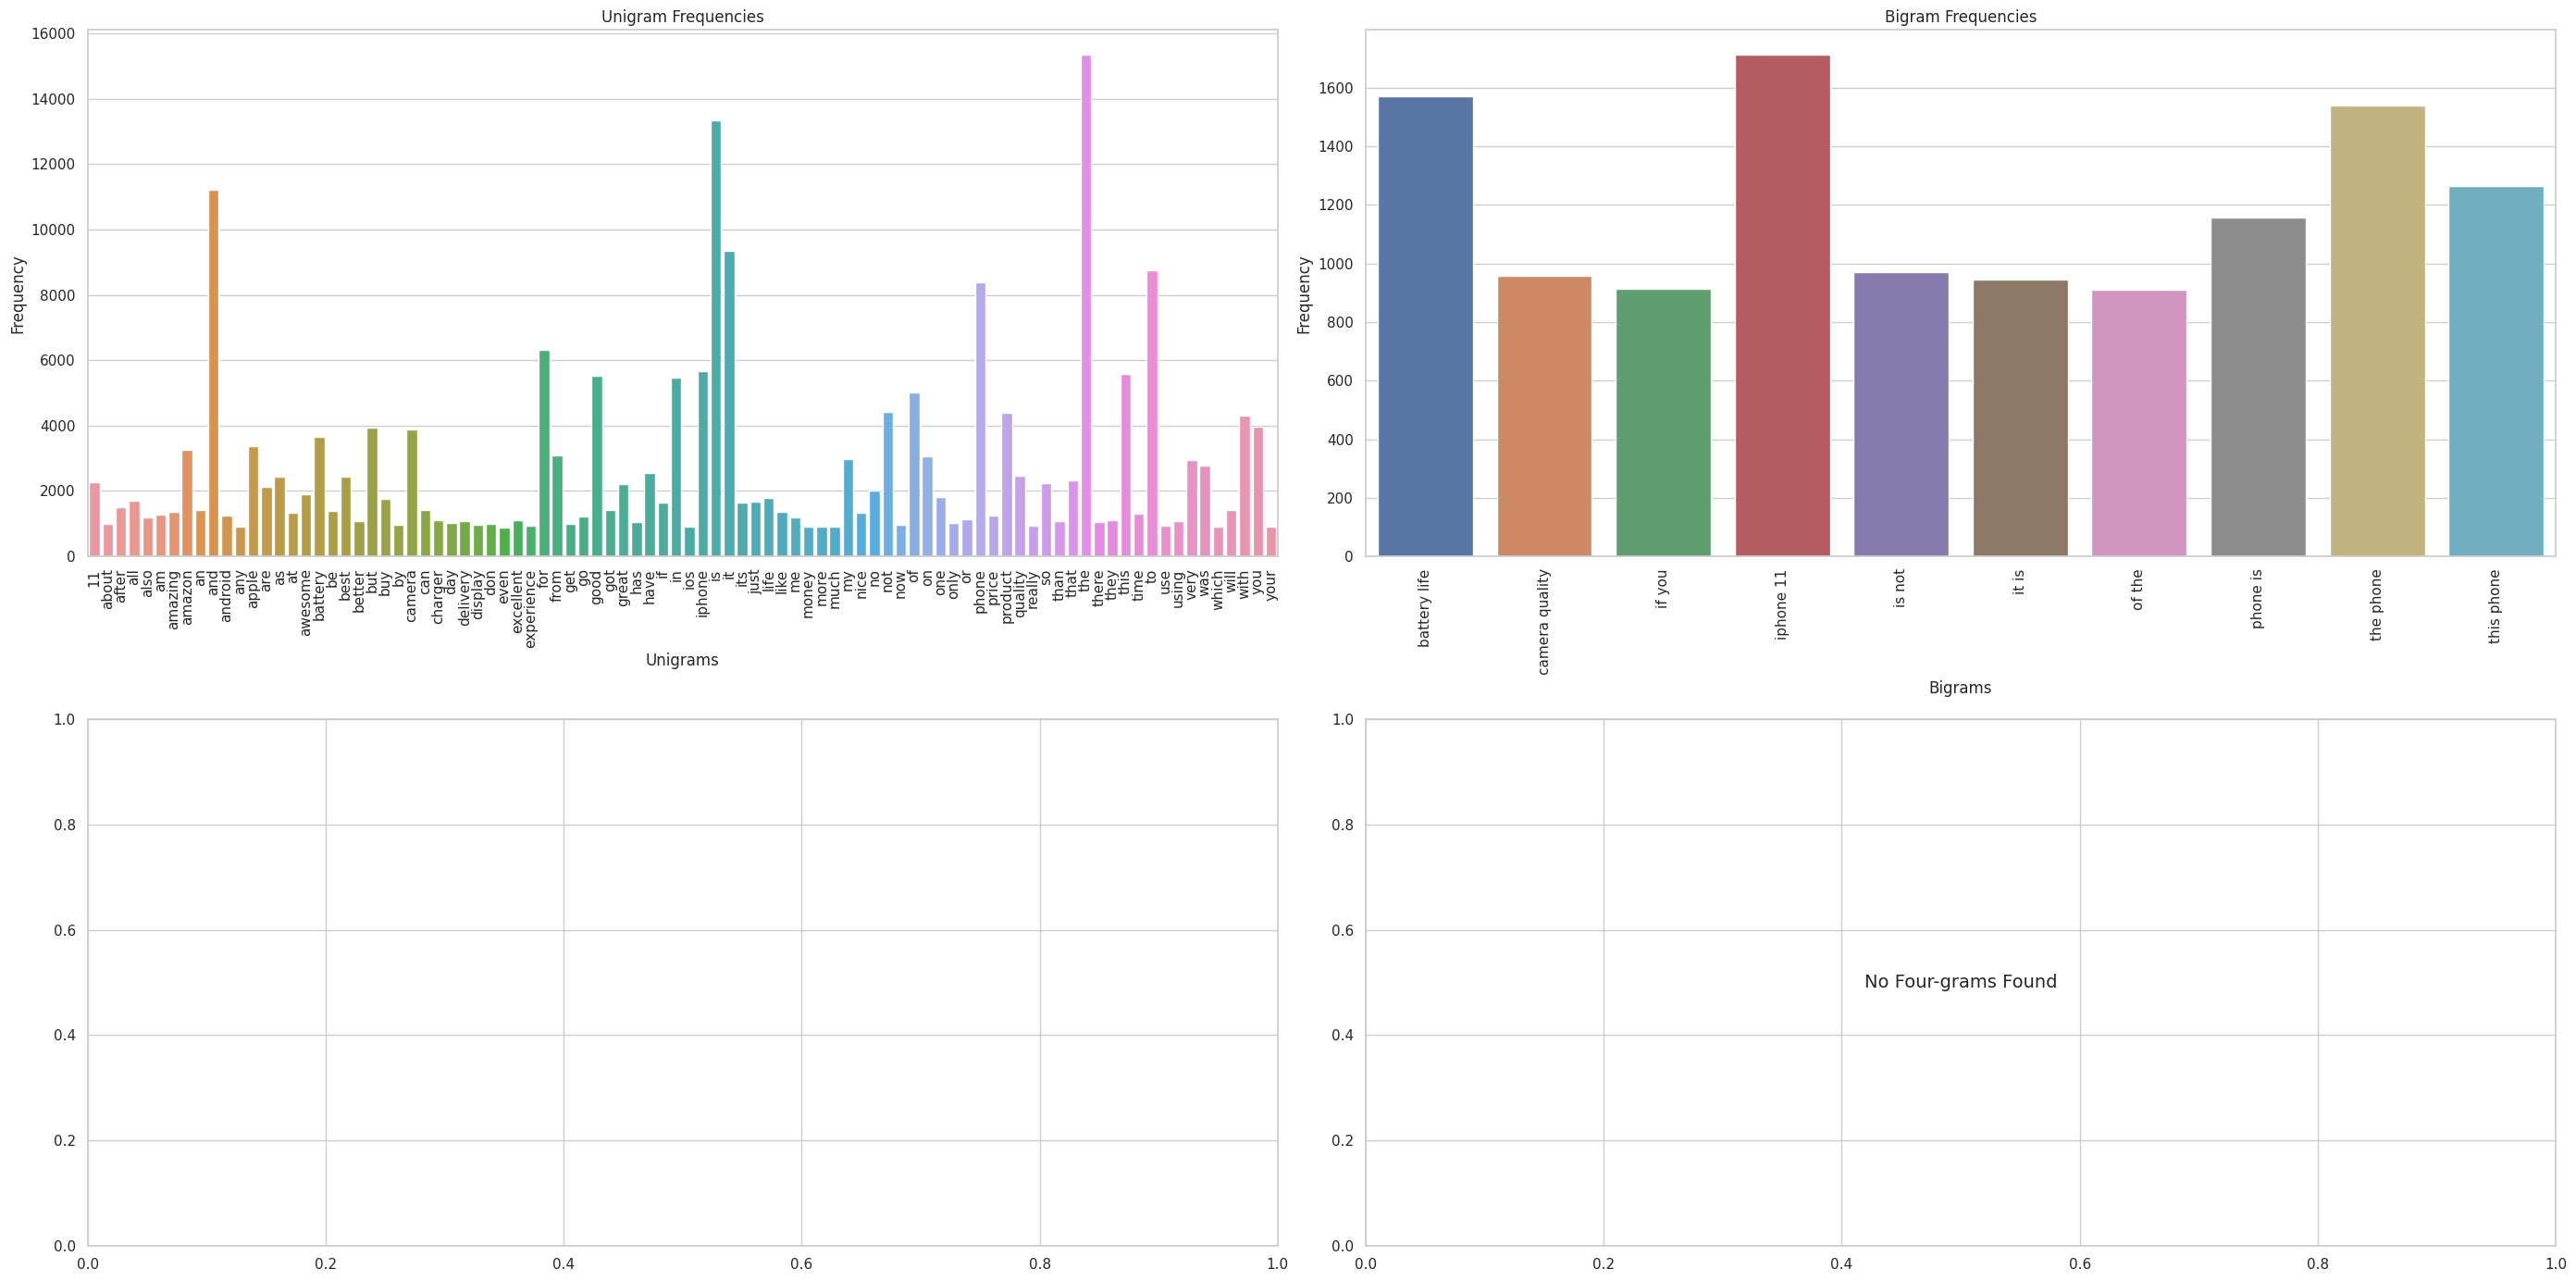

In [128]:
# Getting feature names from CountVectorizer
feature_names = vect_ngram_range.get_feature_names_out()

# Converting bag-of-words matrix to a DataFrame for easy manipulation
bow_df = pd.DataFrame(bow_matrix_ngram.toarray(), columns=feature_names)

# Creating a function to filter n-grams based on length
def filter_ngrams(bow_df, n):
    return bow_df.loc[:, bow_df.columns.str.split().str.len() == n]

# Filtering unigrams, bigrams, trigrams, and four-grams
unigram_df = filter_ngrams(bow_df, 1)
unigram_freq = unigram_df.sum(axis=0)

bigram_df = filter_ngrams(bow_df, 2)
bigram_freq = bigram_df.sum(axis=0)

trigram_df = filter_ngrams(bow_df, 3)
trigram_freq = trigram_df.sum(axis=0)

fourgram_df = filter_ngrams(bow_df, 4)
fourgram_freq = fourgram_df.sum(axis=0)

# Setting the style for Seaborn plots (optional)
sns.set(style="whitegrid")

# Creating a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(28, 14))

# Plotting unigram frequencies using Seaborn
sns.barplot(x=unigram_freq.index, y=unigram_freq.values, ax=axes[0, 0])
axes[0, 0].set_title("Unigram Frequencies")
axes[0, 0].set_xlabel("Unigrams")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].tick_params(axis='x', rotation=90)

# Plotting bigram frequencies using Seaborn
sns.barplot(x=bigram_freq.index, y=bigram_freq.values, ax=axes[0, 1])
axes[0, 1].set_title("Bigram Frequencies")
axes[0, 1].set_xlabel("Bigrams")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].tick_params(axis='x', rotation=90)

# Checking if there are any trigrams present before plotting
if not trigram_freq.empty:
    # Plotting trigram frequencies using Seaborn
    sns.barplot(x=trigram_freq.index, y=trigram_freq.values, ax=axes[1, 0])
    axes[1, 0].set_title("Trigram Frequencies")
    axes[1, 0].set_xlabel("Trigrams")
    axes[1, 0].set_ylabel("Frequency")
    axes[1, 0].tick_params(axis='x', rotation=90)
# else:
    # If no trigrams are present, adding a message to the plot
    # axes[1, 0].text(0.5, 0.5, "No Trigrams Found", ha='center', va='center', fontsize=14)

# Checking if there are any four-grams present before plotting
if not fourgram_freq.empty:
    # Plotting four-gram frequencies using Seaborn
    sns.barplot(x=fourgram_freq.index, y=fourgram_freq.values, ax=axes[1, 1])
    axes[1, 1].set_title("Four-gram Frequencies")
    axes[1, 1].set_xlabel("Four-grams")
    axes[1, 1].set_ylabel("Frequency")
    axes[1, 1].tick_params(axis='x', rotation=90)
else:
    # If no four-grams are present, adding a message to the plot
    axes[1, 1].text(0.5, 0.5, "No Four-grams Found", ha='center', va='center', fontsize=14)

# Adjusting subplot spacing
plt.tight_layout()

# Show the subplots
plt.show()


In [129]:
# Checking for trigrams
trigrams_present = trigram_df.columns[trigram_df.sum() > 0]

# Checking for four-grams
fourgrams_present = fourgram_df.columns[fourgram_df.sum() > 0]

print("Trigrams Present:")
print(trigrams_present)

print("\nFour-grams Present:")
print(fourgrams_present)


Trigrams Present:
Index([], dtype='object')

Four-grams Present:
Index([], dtype='object')


    Since, there is no words in trigram and four grams so the plot is blank

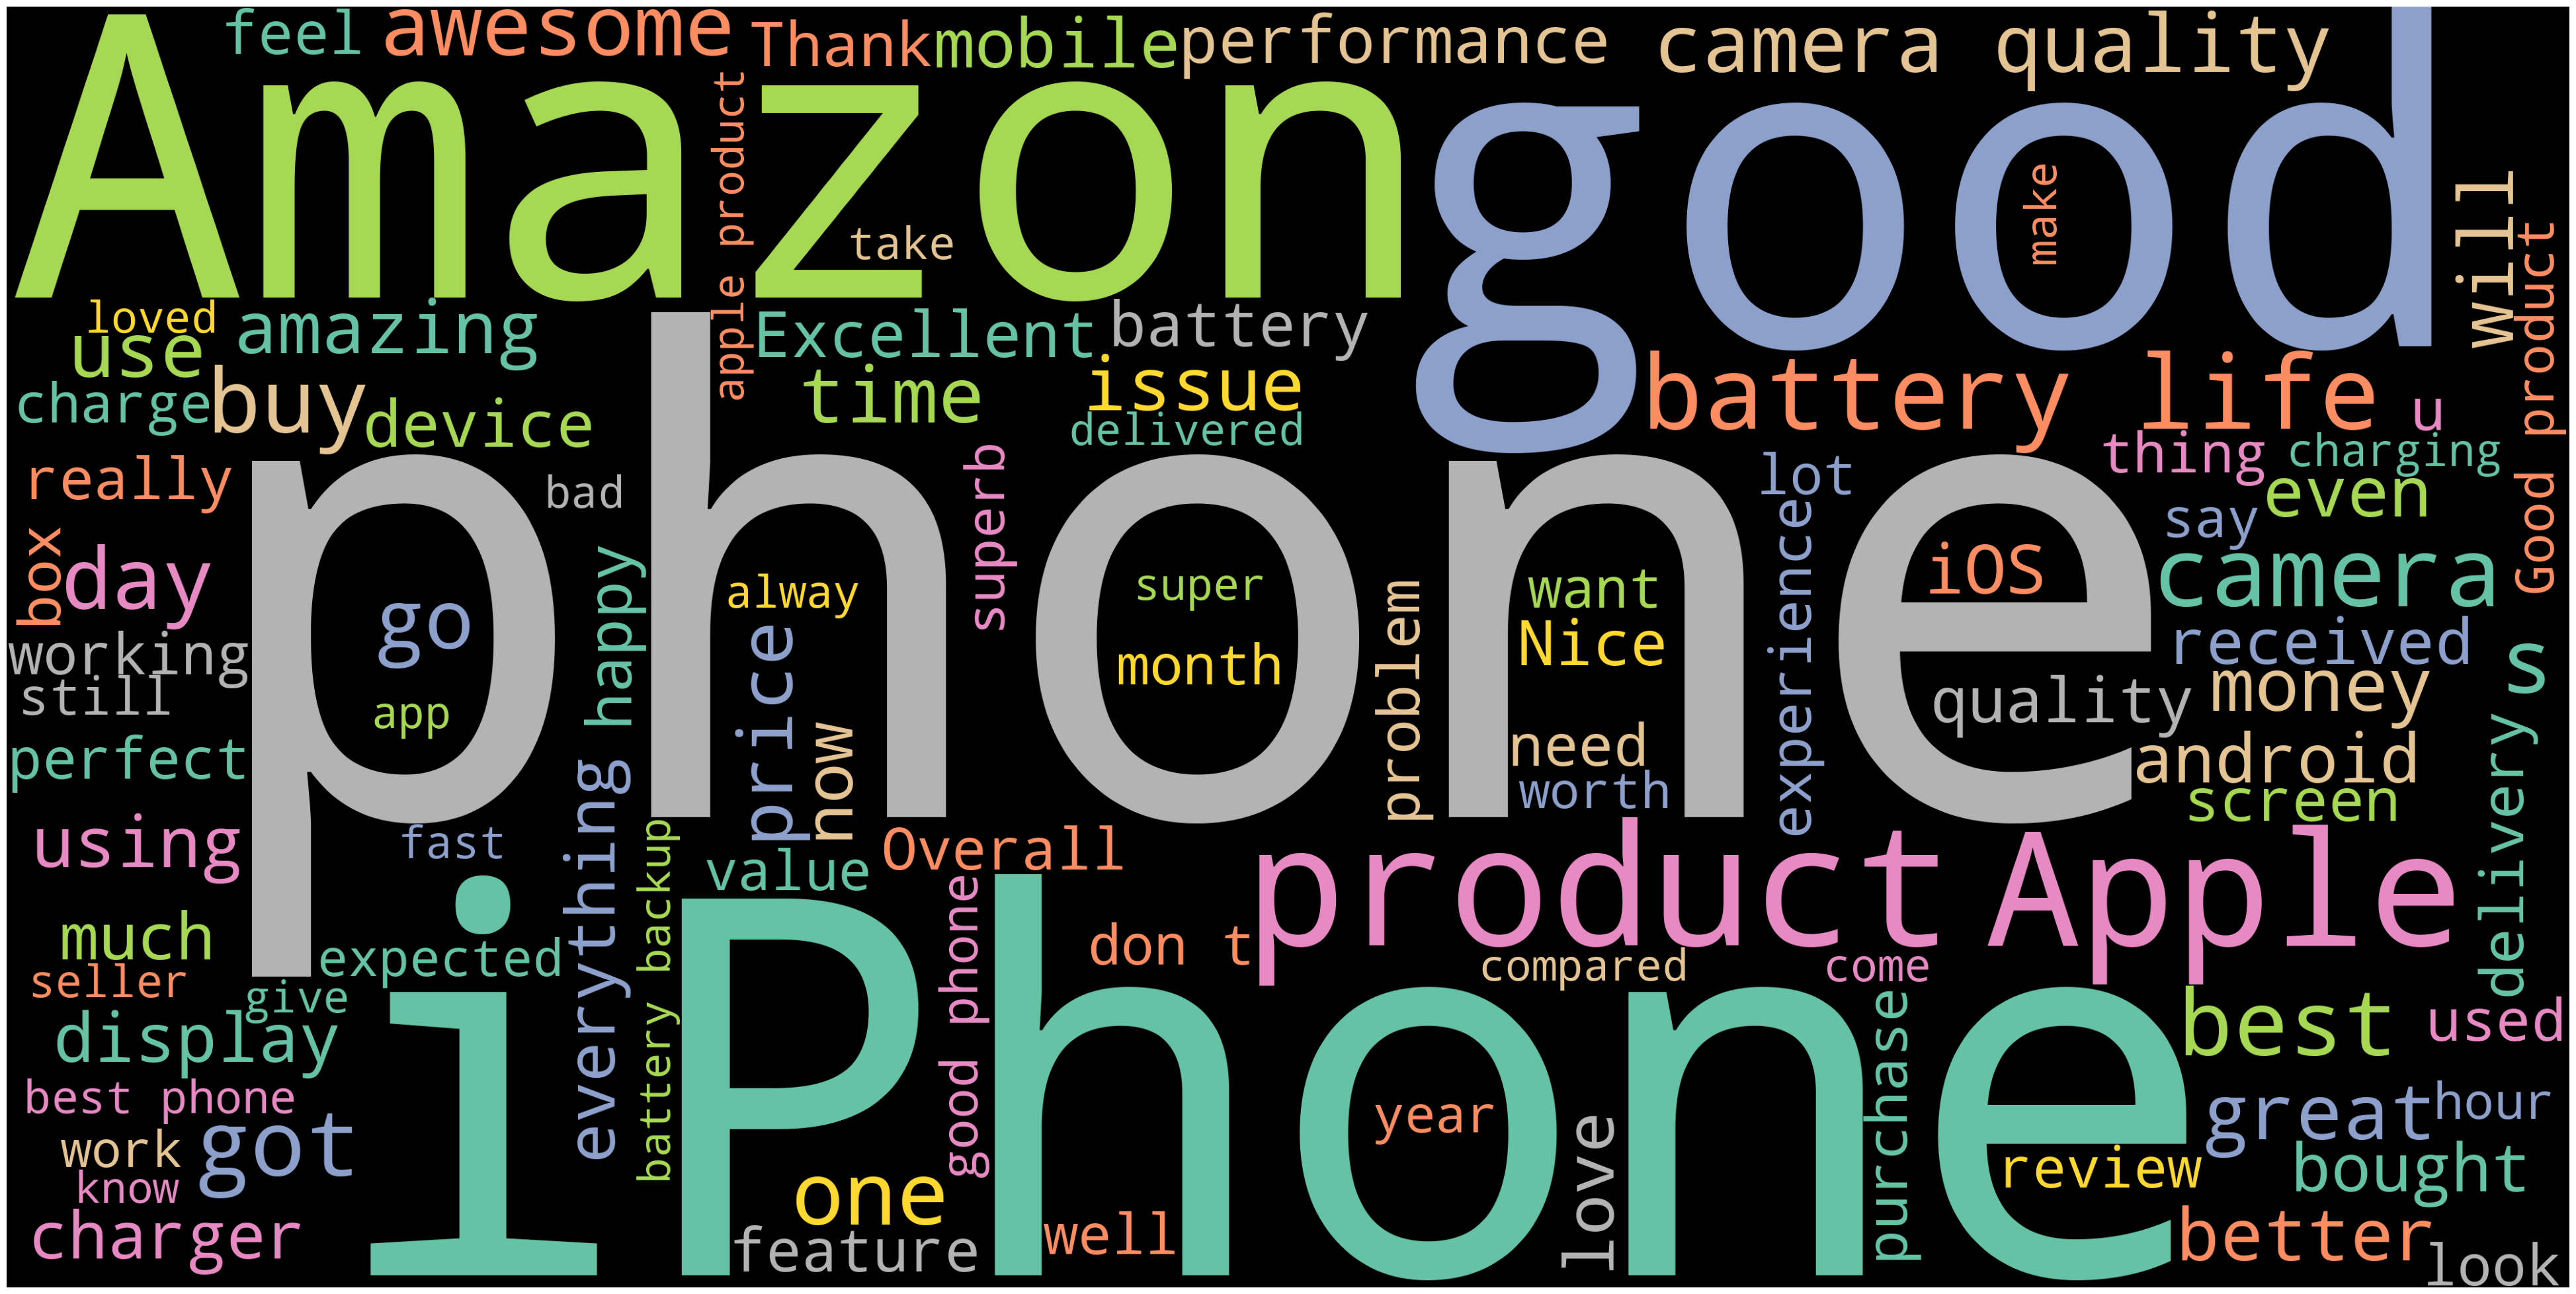

In [130]:
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
  plt.figure(figsize=(50,40))   #Defining image size
  plt.imshow(wordcloud)    # Display image
  plt.axis('off')       #No axis details

wordcloud = WordCloud(width=4000,height=2000,background_color='black',max_words=100,colormap='Set2',stopwords=stopwords).generate(string_for_wordcloud)
plot_cloud(wordcloud)

In [131]:
wordcloud.to_file('iphone_wordcloud.png')

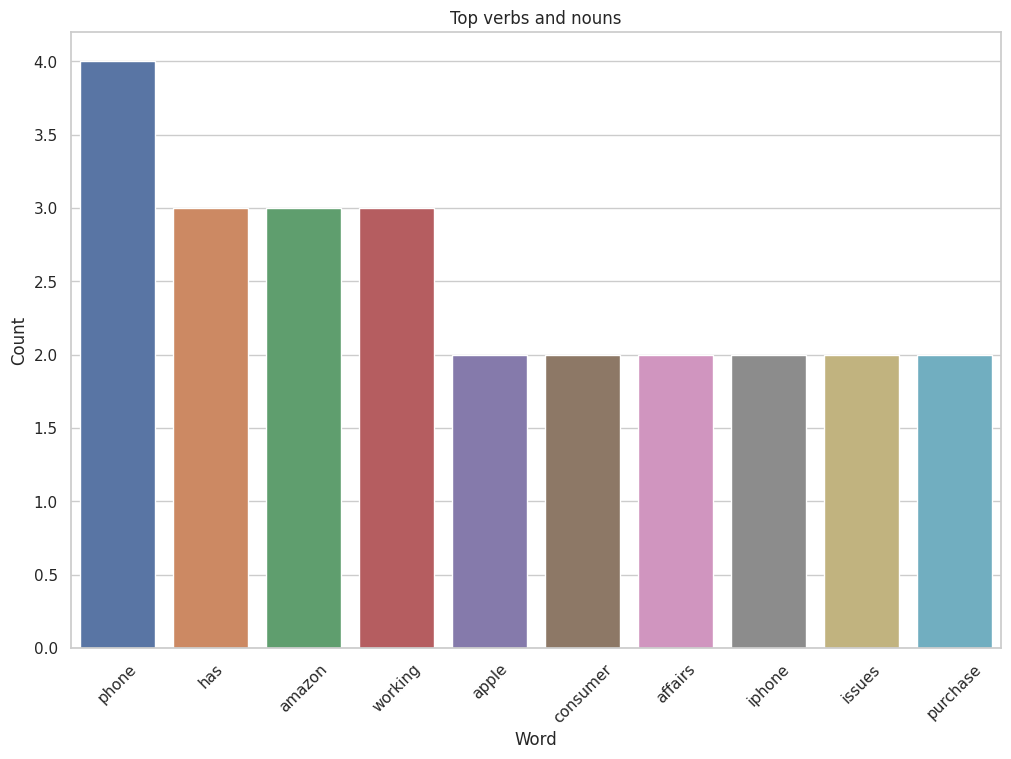

In [132]:
##Visualizing results
#Barchart for top 10 nouns + verbs
subset_df = wf_df.head(10)  # Select the first 10 rows

plt.figure(figsize=(12, 8))
sns.barplot(x='word', y='count', data=subset_df)
plt.title('Top verbs and nouns')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

##### Emotion Mining

In [135]:
#Sentiment Analysis using Affin lexicon. Below without Affin is also implemented
afinn = pd.read_csv('/content/Afinn.csv',encoding='ISO-8859-1')
afinn

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [136]:
afinn.shape

(2477, 2)

In [137]:
iphone = pd.read_csv('/content/iphone_reviews.csv')
iphone.head()

category  rating                              product  \
0  Mobiles & Accessories       1  New Apple iPhone 11 (64GB) - Purple   
1  Mobiles & Accessories       1  New Apple iPhone 11 (64GB) - Purple   
2  Mobiles & Accessories       1  New Apple iPhone 11 (64GB) - Purple   
3  Mobiles & Accessories       1  New Apple iPhone 11 (64GB) - Purple   
4  Mobiles & Accessories       1  New Apple iPhone 11 (64GB) - Purple   

  helpful_count           crawled_at                 sub_category        asin  \
0           356  2021-01-26 13:54:03  Smartphones & Basic Mobiles  B08L8CHS2X   
1           363  2021-01-26 13:54:03  Smartphones & Basic Mobiles  B08L8CHS2X   
2           239  2021-01-26 13:54:03  Smartphones & Basic Mobiles  B08L8CHS2X   
3           277  2021-01-26 13:54:03  Smartphones & Basic Mobiles  B08L8CHS2X   
4           191  2021-01-26 13:54:03  Smartphones & Basic Mobiles  B08L8CHS2X   

  review_country                                    raw_description  \
0          India  <span class="a-size-base review-text review-te...   
1          India  <span class="a-size-base review-text review-te...   
2          India  <span class="a-size-base review-text review-te...   
3          India  <span class="a-size-base review-text review-te...   
4          India  <span class="a-size-base review-text review-te...   

                                         description     profile_name  \
0  \n\n  The phone seems to be owned by some shiv...  Amazon Customer   
1  \n\n  Its my first iphone and now I’m feeling ...     Bhawna juyal   
2  \n\n  I found this black spot while doing set ...          Vinayak   
3  \n\n  Samsung s10 is much better than iphone 1...     Shipra Goyal   
4  \n\n  hiI had purchased this phone in first we...      gaurav garg   

           reviewed_at                                   _id  average_rating  \
0  2020-06-10 00:00:00  f7030d10-c987-536b-a356-f642cb1ec5e3             4.5   
1  2019-10-10 00:00:00  775c9997-8c2c-5dda-9faf-0f0e29ac9cb0             4.5   
2  2020-06-06 00:00:00  089a10aa-ef92-577c-93f7-fd85e26f6bf0             4.5   
3  2019-10-23 00:00:00  217a69c8-f3d6-58b0-9ec0-8a1e3514e24e             4.5   
4  2020-06-24 00:00:00  5e2e9ea9-a32d-51fe-bd7b-f0ebe5749ebd             4.5   

  product_company                        review_title  review_uniq_id  \
0           Apple                  Second hand device   RCNKLUGAMJBPH   
1           Apple                       Heating issue  R1HWMMIJ21WTZR   
2           Apple  Black spot found on the new phone.  R3FZWAU9I8B7Q5   
3           Apple   Samsung s10 is better than iphone  R386FDLMAZDUPG   
4           Apple                     Defective model   RXAOS1IG04N09   

                                              images  verified_purchase  \
0                                                 []               True   
1                                                 []               True   
2  ['https://images-na.ssl-images-amazon.com/imag...               True   
3                                                 []               True   
4                                                 []               True   

   total_comments  
0               0  
1               0  
2               0  
3               0  
4               0

In [138]:
df = iphone[['description']]
df.head()

description
0  \n\n  The phone seems to be owned by some shiv...
1  \n\n  Its my first iphone and now I’m feeling ...
2  \n\n  I found this black spot while doing set ...
3  \n\n  Samsung s10 is much better than iphone 1...
4  \n\n  hiI had purchased this phone in first we...

In [139]:
iphone['description'] = iphone['description'].astype('str')
iphone['description'].dtypes

dtype('O')

In [140]:
iphone = [i.strip() for i in iphone['description']] # Removing both the leading and the trailing characters
iphone = [i for i in iphone if i] # Removing empty strings, because they are considered in Python as False
iphone[0:10]

["The phone seems to be owned by some shivang gupta earlier...he has all his details filled in...it's dishearting to know that an esteemed company like apple and amazon woul provide it's users a second hand device. This needs serious and immediate attention.Regards,Deputy directorBureau of Indian standardsMinistry of consumer affairs and public distributionMinistry of consumer affairs",
 'Its my first iphone and now I’m feeling like I’ve wasted my money coz it has heating issues',
 "I found this black spot while doing set up. Given me defective piece & now not able to give for replacement also. It's a very next day of purchase.",
 'Samsung s10 is much better than iphone 11',
 'hiI had purchased this phone in first week of June 2020 trusting amazon.But this phone is defective, it failed to update, failed to connect to serversFinding no other solution, I used old version of iOS hoping it will work finebut it is not working fine, everytime it hangs and I am not able to worktoday while put

In [141]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [142]:
# Tokenization of sentences
from nltk import tokenize
sentences = tokenize.sent_tokenize(' '.join(iphone))
sentences[0:15]

["The phone seems to be owned by some shivang gupta earlier...he has all his details filled in...it's dishearting to know that an esteemed company like apple and amazon woul provide it's users a second hand device.",
 'This needs serious and immediate attention.Regards,Deputy directorBureau of Indian standardsMinistry of consumer affairs and public distributionMinistry of consumer affairs Its my first iphone and now I’m feeling like I’ve wasted my money coz it has heating issues I found this black spot while doing set up.',
 'Given me defective piece & now not able to give for replacement also.',
 "It's a very next day of purchase.",
 'Samsung s10 is much better than iphone 11 hiI had purchased this phone in first week of June 2020 trusting amazon.But this phone is defective, it failed to update, failed to connect to serversFinding no other solution, I used old version of iOS hoping it will work finebut it is not working fine, everytime it hangs and I am not able to worktoday while put

In [143]:
# Creating dataframe of sentences

sent_df = pd.DataFrame(sentences,columns=['sentence'])
sent_df

sentence
0      The phone seems to be owned by some shivang gu...
1      This needs serious and immediate attention.Reg...
2      Given me defective piece & now not able to giv...
3                      It's a very next day of purchase.
4      Samsung s10 is much better than iphone 11 hiI ...
...                                                  ...
23960  The iconic iPhone home button is no longer a p...
23961  The new A10 Fusion processor blends two high-p...
23962  Have been using this device for more than 7 mo...
23963                                  It’s ben awesome.
23964     I love how fluidic the software experience is.

[23965 rows x 1 columns]

In [144]:
affin_score = afinn.set_index('word')['value'].to_dict()
affin_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [145]:
#Custom function :scoring each word in a sentence in lemmatised form,
#calculating the score for the whole original sentence.
# nlp = spacy.load('en_core_web_md')
sentiment_lexicon = affin_score

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [147]:
# testing that it is working
calculate_sentiment(text = 'I love iphone. Very soon I will purchase brand new iphone')

3

In [148]:
# Calculating sentiment_value of each sentences/row from sent_df and storing sentiment_value corresponding to sentence in sent_df
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [149]:
sent_df

sentence  sentiment_value
0      The phone seems to be owned by some shivang gu...                4
1      This needs serious and immediate attention.Reg...                1
2      Given me defective piece & now not able to giv...                0
3                      It's a very next day of purchase.                0
4      Samsung s10 is much better than iphone 11 hiI ...               -1
...                                                  ...              ...
23960  The iconic iPhone home button is no longer a p...                0
23961  The new A10 Fusion processor blends two high-p...                2
23962  Have been using this device for more than 7 mo...                0
23963                                  It’s ben awesome.                4
23964     I love how fluidic the software experience is.                3

[23965 rows x 2 columns]

In [150]:
# Filtering and accesing with different values
sent_df[sent_df.sentiment_value < -5]

sentence  sentiment_value
13     The worst phn I have bought,started to heat up...              -14
57     Total waste of money And Time I am first time ...               -8
91     Please guys dont buy it from Amazon..Something...               -6
105    It is defective phone camera not working on is...               -7
160    No such quality in camera or battery that one ...               -6
...                                                  ...              ...
23126  Waste mobile device loosing its colour The ear...               -6
23128  It was initially a minor problem which I never...              -13
23140  Hell with this product and amazon service It h...               -6
23181  (Dumbness)3) Battery - Should be given negativ...               -9
23323  I having network issue with it when i was comp...               -9

[187 rows x 2 columns]

In [151]:
sent_df[sent_df.sentiment_value > 10]

sentence  sentiment_value
393    Now coming to the phone or should I say iPhone...               26
449    Battery Life-Can't Complain much on this, pret...               15
494    Buttery smooth with superb display comparable ...               16
566    overall a very good phone thanks Amazon for fa...               21
594    This my first Apple productGreat phone great c...               23
...                                                  ...              ...
23840  Awesome phone...just loved itThnx Amazon for a...               11
23845  Awesome one ... go buy it Awesome phone prompt...               15
23857  Good camera quality I love it Excellent produc...               14
23927  A Punchy display, A clever crisp audio process...               12
23934  VERY GOOD PRODUCT...YOU CAN GO FOR IT IN 2020 ...               39

[1550 rows x 2 columns]

In [152]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df.head(10)

sentence  sentiment_value  \
0  The phone seems to be owned by some shivang gu...                4   
1  This needs serious and immediate attention.Reg...                1   
2  Given me defective piece & now not able to giv...                0   
3                  It's a very next day of purchase.                0   
4  Samsung s10 is much better than iphone 11 hiI ...               -1   
5                                  Don't buy online.                0   
6  My back camera has problem,  shows many green ...               -2   
7                     Apple store is of little help.                2   
8                Amazon as expected,  is of NO help.                1   
9                      Waiting to get this resolved.                2   

   word_count  
0          36  
1          46  
2          13  
3           7  
4         121  
5           3  
6           9  
7           6  
8           7  
9           5

In [153]:
sent_df.sort_values(by='sentiment_value').tail(10)

sentence  sentiment_value  \
4614   Its not a phone its symbol of your attitude, l...               69   
13350  True lover of Amazon 🥰 The best Very beautiful...               70   
18135  Excellent Great looking phone amazing camera q...               72   
11759  Perfect Amazing Genuine Awesome Awesome Awesom...               78   
13367  love it I Phone 11 just one Word WOW 💥🔥♥️ Nice...               83   
2190   👍 No Na Ok 👌 Perfect ❤️ Very Good Love it😍 Awe...               88   
13342  Good camera with multiple features This is awe...               97   
18160  Zabardast camera no issues at all best mobile ...              101   
2194   Awesome Good Awesome phone Nice phone Good Sup...              106   
9006   Its very gud production Best phone Best phone ...              123   

       word_count  
4614          105  
13350          64  
18135         143  
11759          42  
13367          56  
2190           82  
13342         166  
18160          95  
2194          103  
9006          106

In [154]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    23965.000000
mean         2.630044
std          5.775562
min        -19.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        123.000000
Name: sentiment_value, dtype: float64

In [155]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

sentence  sentiment_value  \
2  Given me defective piece & now not able to giv...                0   
3                  It's a very next day of purchase.                0   
4  Samsung s10 is much better than iphone 11 hiI ...               -1   
5                                  Don't buy online.                0   
6  My back camera has problem,  shows many green ...               -2   

   word_count  
2          13  
3           7  
4         121  
5           3  
6           9

In [156]:
sent_df[sent_df['sentiment_value']<-5]

sentence  sentiment_value  \
13     The worst phn I have bought,started to heat up...              -14   
57     Total waste of money And Time I am first time ...               -8   
91     Please guys dont buy it from Amazon..Something...               -6   
105    It is defective phone camera not working on is...               -7   
160    No such quality in camera or battery that one ...               -6   
...                                                  ...              ...   
23126  Waste mobile device loosing its colour The ear...               -6   
23128  It was initially a minor problem which I never...              -13   
23140  Hell with this product and amazon service It h...               -6   
23181  (Dumbness)3) Battery - Should be given negativ...               -9   
23323  I having network issue with it when i was comp...               -9   

       word_count  
13             88  
57             69  
91             46  
105            33  
160           111  
...           ...  
23126          14  
23128          39  
23140          27  
23181         121  
23323         113  

[187 rows x 3 columns]

In [157]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[1]

'Total waste of money And Time I am first time purches iphone11 64 gb but very poor product and amazon delever to defective pecie, thus phone is very heat and charge also, i am very disappointed this servise i am never buy to any product to thoroughly amazon plzz all iphone user don’t purchase online plzz very bed product to sell to amazon The camera quality is too bad.'

In [158]:
sent_df['index']=range(0,len(sent_df))
sent_df

sentence  sentiment_value  \
0      The phone seems to be owned by some shivang gu...                4   
1      This needs serious and immediate attention.Reg...                1   
2      Given me defective piece & now not able to giv...                0   
3                      It's a very next day of purchase.                0   
4      Samsung s10 is much better than iphone 11 hiI ...               -1   
...                                                  ...              ...   
23960  The iconic iPhone home button is no longer a p...                0   
23961  The new A10 Fusion processor blends two high-p...                2   
23962  Have been using this device for more than 7 mo...                0   
23963                                  It’s ben awesome.                4   
23964     I love how fluidic the software experience is.                3   

       word_count  index  
0              36      0  
1              46      1  
2              13      2  
3               7      3  
4             121      4  
...           ...    ...  
23960          30  23960  
23961          40  23961  
23962          10  23962  
23963           3  23963  
23964           8  23964  

[23965 rows x 4 columns]

<Axes: xlabel='index', ylabel='sentiment_value'>

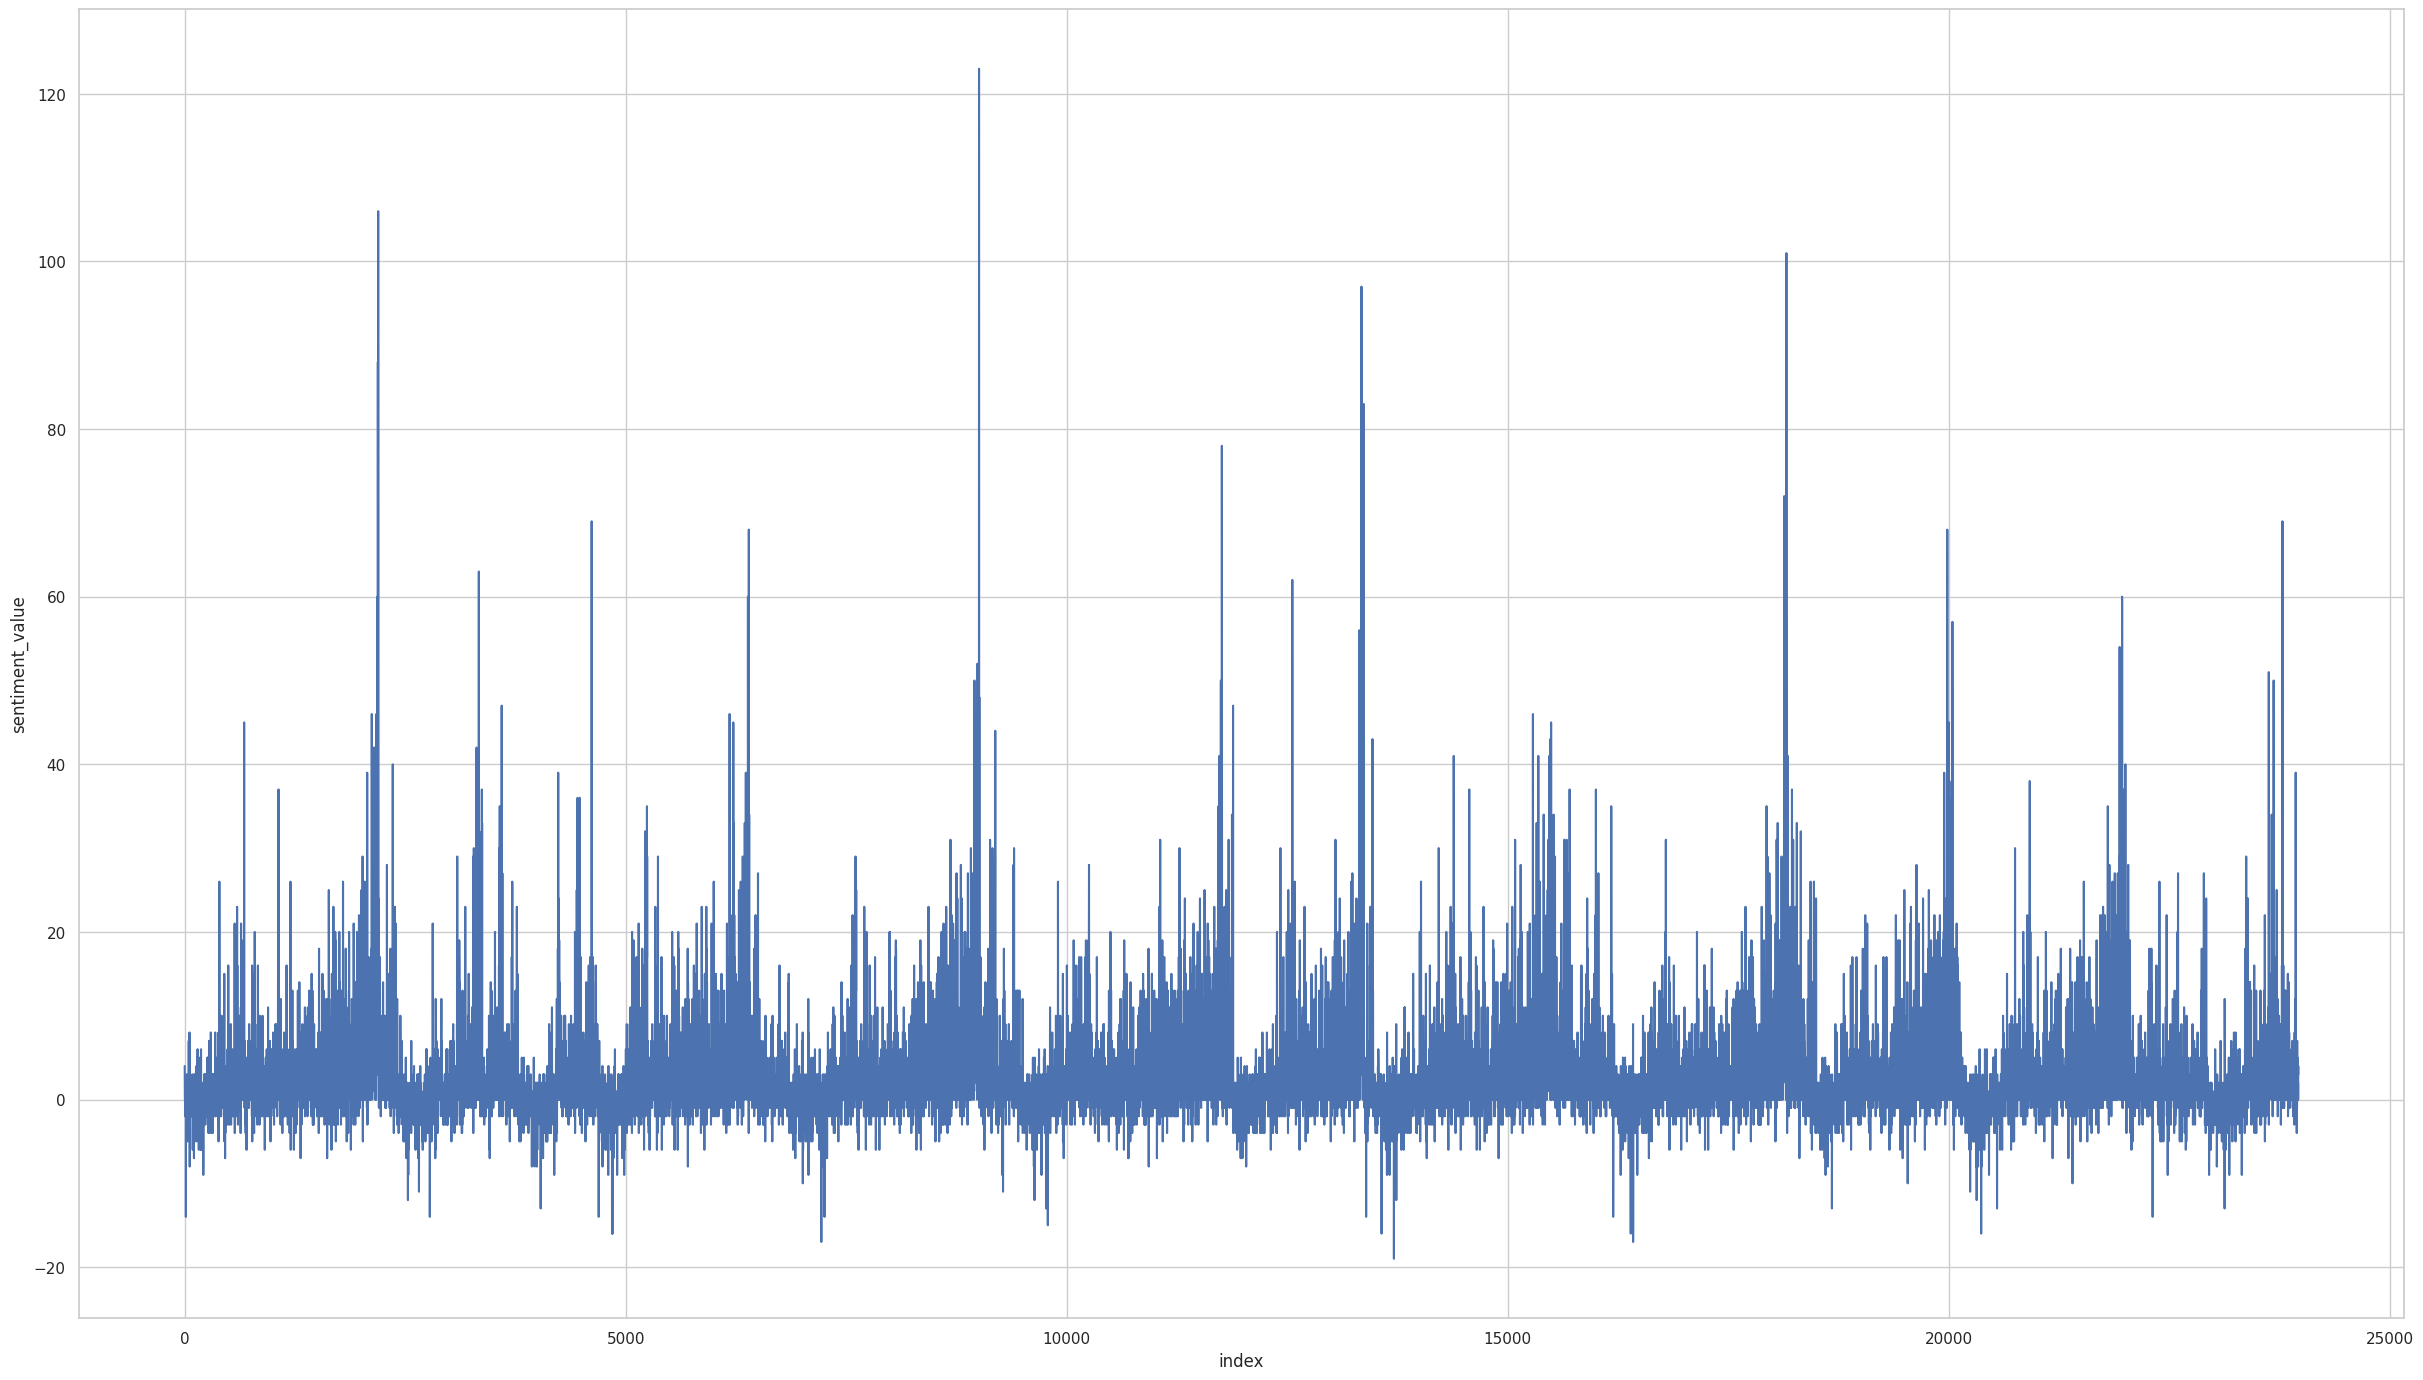

In [159]:
# Lineplot of sentiment values
plt.figure(figsize=(30, 17))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

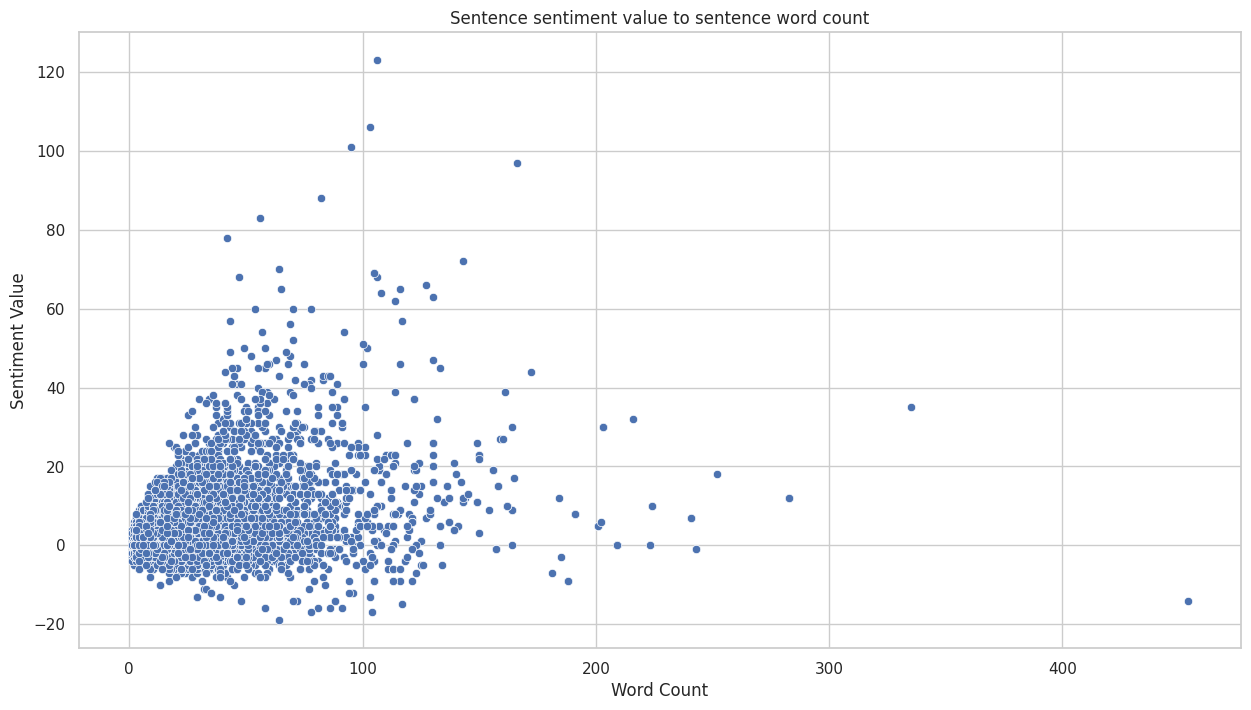

In [160]:
# Plot of WordCount vs sentiment value
plt.figure(figsize=(15, 8))
sns.scatterplot(data=sent_df, x='word_count', y='sentiment_value')
plt.title('Sentence sentiment value to sentence word count')
plt.xlabel('Word Count')
plt.ylabel('Sentiment Value')
plt.show()

In [161]:
sent_df[sent_df['sentiment_value']>20]

sentence  sentiment_value  \
393    Now coming to the phone or should I say iPhone...               26   
566    overall a very good phone thanks Amazon for fa...               21   
594    This my first Apple productGreat phone great c...               23   
639    Good choice for users willing to use ios for f...               21   
673    Fabulous Great product loving it... Amazing......               22   
...                                                  ...              ...   
23681  Yes Cinema quality display Awesome product nic...               22   
23684  Good Awesome phone Working osam loved the phon...               50   
23719  greart Super 👍🏻👍🏻👍🏻👍🏻 Nice phone One of the to...               25   
23784  Its not a phone its symbol of your attitude, l...               69   
23934  VERY GOOD PRODUCT...YOU CAN GO FOR IT IN 2020 ...               39   

       word_count  index  
393           130    393  
566            73    566  
594           101    594  
639            73    639  
673            22    673  
...           ...    ...  
23681          25  23681  
23684          49  23684  
23719          63  23719  
23784         105  23784  
23934         161  23934  

[389 rows x 4 columns]

##### Manual Calculation of Sentiment using the file given to us

In [162]:
# Loading the iPhone reviews data
df = pd.read_csv('/content/iphone_reviews.csv')
df = df[['description']]
df['description'] = df['description'].astype('str')

# Loading positive and negative word lists
with open('/content/positive-words.txt', 'r') as positive_file:
    positive_words = positive_file.read().splitlines()

with open('/content/negative-words.txt', 'r') as negative_file:
    negative_words = negative_file.read().splitlines()

# Loading stop words from stop.txt
with open('/content/stop.txt', 'r') as stop_file:
    stop_words = stop_file.read().splitlines()

In [163]:
# Function to calculate sentiment score based on positive and negative words, while removing stop words
def calculate_sentiment(text):
    words = text.split()
    # Removing stop words
    words = [word for word in words if word.lower() not in stop_words]

    # Checking if there are words left after removing stop words
    if len(words) == 0:
        return 0.0  # Returns a neutral sentiment score (0.0) if no words are left

    positive_count = sum(1 for word in words if word.lower() in positive_words)
    negative_count = sum(1 for word in words if word.lower() in negative_words)

    # Checking if the denominator (len(words)) is zero to avoid ZeroDivisionError
    if len(words) == 0:
        return 0.0  # Returns a neutral sentiment score (0.0) if no words are left
    sentiment_score = (positive_count - negative_count) / len(words)
    return sentiment_score

# Applys sentiment analysis to each review
df['sentiment_score'] = df['description'].apply(calculate_sentiment)

# Displaying the DataFrame with sentiment scores
df

description  sentiment_score
0      \n\n  The phone seems to be owned by some shiv...         0.000000
1      \n\n  Its my first iphone and now I’m feeling ...        -0.222222
2      \n\n  I found this black spot while doing set ...        -0.076923
3      \n\n  Samsung s10 is much better than iphone 1...         0.000000
4      \n\n  hiI had purchased this phone in first we...        -0.027027
...                                                  ...              ...
19679  \n\n  its a awsum phone but they said that the...         0.000000
19680  \n\n  I purchased this when there was a deal f...         0.108108
19681                            \n\n  User friendly\n\n         0.500000
19682  \n\n  The iPhone 7 and 7 Plus are deeply unusu...        -0.011628
19683  \n\n  Have been using this device for more tha...         0.090909

[19684 rows x 2 columns]

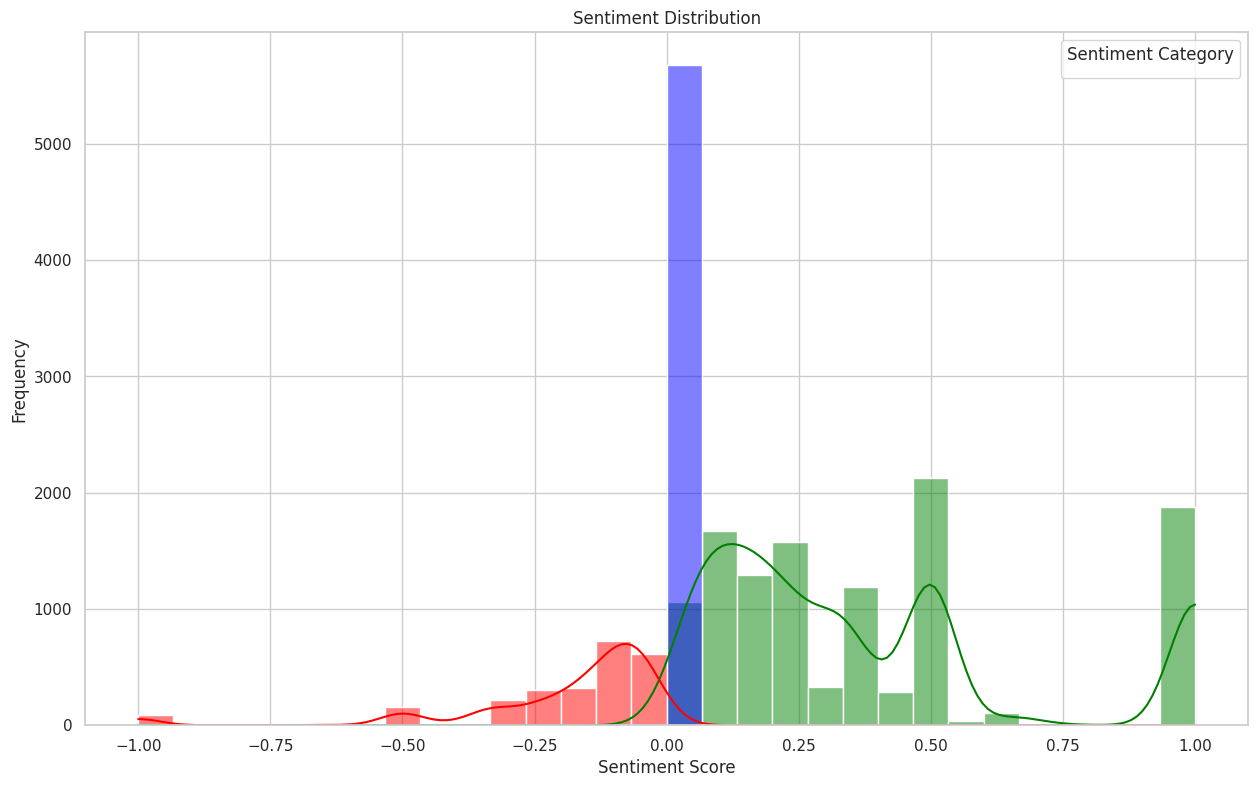

In [165]:
# Defining color mapping for sentiment categories
def assign_color(sentiment_score):
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Creating a new column for sentiment categories
df['sentiment_category'] = df['sentiment_score'].apply(assign_color)

# Defining a color palette for the categories
color_palette = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

# Visualizing sentiment scores with different colors
plt.figure(figsize=(15, 9))
sns.histplot(data=df, x='sentiment_score', bins=30, kde=True, hue='sentiment_category', palette=color_palette)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend(title='Sentiment Category')
plt.show()

#Green bars shows Positive sentiments, Blue shows Neutral sentiment, and red shows Negative correlation where we can see Negative sentiments are less

###### Dummy - Extras for Webscraping

In [15]:
import requests
import bs4
from bs4 import BeautifulSoup

In [42]:
url = 'https://www.amazon.in/Apple-iPhone-13-256GB-Starlight/product-reviews/B09G9BFKZN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
HEADERS = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36','Accept-Language':'en-US, en;q=0.5'})
response = requests.get(url,headers=HEADERS)
print(response)
html_content = response.content
print(html_content)
soup = BeautifulSoup(html_content,'html.parser')

text = []
target_div = soup.find('div',class_='a-row a-spacing-small review-data')
if target_div:
  text = target_div.find_all('span')
print(text)

<Response [200]>
b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com" crossorigin>\n<link rel="preconnect" href="https://images-eu.ssl-images-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://m.media-amazon.com" crossorigin>\n<link rel="preconnect" href="https://m.media-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://completion.amazon.com" crossorigin>\n<link rel="preconnect" href="https://completion.amazon.com" crossorigin>\n<!-- sp:end-feature:cs-optimi

In [43]:
text

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>Got it for 65K on Amazon prime day. So as a lifelong android user I have switched to IOS. So will be dividing this into the pros and negs:<br/>Product red 128GB<br/>Pros:<br/>1) Received genuine product from Amazon( was quite sceptic about it though)<br/>2) Built quality excellent<br/>3) Camera quality excellent. True to life color reproduction, Indoor conditions amazing, night photos are good, facial tones are very good, day clicks are amazing. In short it's an amazing exp. Selfie cam also produces very good quality images. And also no shift in dynamic range while shifting B/W wide and ultra wide cams.<br/>4) Display:- Its a really great display, not 120 hz, but the experience is no less than a 120 hz, coz of apple's great software optimization, buttery smooth, no jitters on the screen, won't feel like a 60 hz panel. Now the notch, yes it will be bothering a little bit but its got its own functi

#### </> By
    Samit Dhawal